## <font color='goldenrod'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

- Explore what types of films are currently doing the best at the box office.
- Translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.
---

### b) Defining the Metric for Success

**The project will be considered a success when we are able to provide three concrete business recommendations to the head of Microsoft's new movie studio.**

**While performing Exploratory Data Analysis I was required to carry out the following steps:**

- Showcase my work value with clear communication.
- Craft a compelling story for my movie studio project
- Use visuals to explore data and present findings. Choose simple and relevant charts with good formatting.
---

### c) Understanding the Context 

**Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.**

### d) Recording the Experimental Design

1. Load the necessary libraries and datasets for our analysis.
2. Perform data cleaning and pre-processing where necessary.
3. Carry out our analysis.
4. Interpret and summarize findings.
5. Provide recommendations.
---

### e) Data Relevance & Acknowledgement.

**These datasets provided were aggregated from a number of sources listed below:** 

- Box Office Mojo (https://www.boxofficemojo.com/)
- IMDB (https://www.imdb.com/)
- Rotten Tomatoes (https://www.rottentomatoes.com/)
- TheMovieDB (https://www.themoviedb.org/)
- The Numbers (https://www.the-numbers.com/)

**The data provided was relevant to answering the our data analysis question.**

---

## <font color='goldenrod'>2. Loading & The Data</font>

In [1]:
# Loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
bom_movie_gross_df = pd.read_csv(r'data\bom.movie_gross.csv')

bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
IMDB_name_basics_df = pd.read_csv(r'data\imdb.name.basics.csv')

IMDB_name_basics_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [4]:
IMDB_title_akas_df = pd.read_csv(r'data\imdb.title.akas.csv')

IMDB_title_akas_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [5]:
df_IMDB_title_basics_df = pd.read_csv(r'data\imdb.title.basics.csv')

df_IMDB_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
IMDB_title_crew_df = pd.read_csv(r'data\imdb.title.crew.csv')

IMDB_title_crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [7]:
IMDB_title_principals_df = pd.read_csv(r'data\imdb.title.principals.csv')

IMDB_title_principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [8]:
IMDB_ratings_df = pd.read_csv(r'data\imdb.title.ratings.csv')

IMDB_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [9]:
rt_movie_info_df = pd.read_csv(r'data\rt.movie_info.tsv', sep='\t')

rt_movie_info_df.set_index('id', inplace=True)

rt_movie_info_df.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [10]:
rt_reviews_df = pd.read_csv(r'data\rt.reviews.tsv', sep='\t', encoding='windows-1254')

rt_reviews_df.set_index('id', inplace=True)

rt_reviews_df.head()

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [11]:
tmdb_movies_df = pd.read_csv(r'data\tmdb.movies.csv', index_col='Unnamed: 0')

tmdb_movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
tn_movie_budgets_df = pd.read_csv(r'data\tn.movie_budgets.csv', index_col='id')

tn_movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## <font color='goldenrod'>3. Preparing The Data</font>

### Data Cleaning & Preparation for the `Box Office Mojo` dataset.

No duplicate rows found.


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
,title,studio,domestic_gross,foreign_gross,year


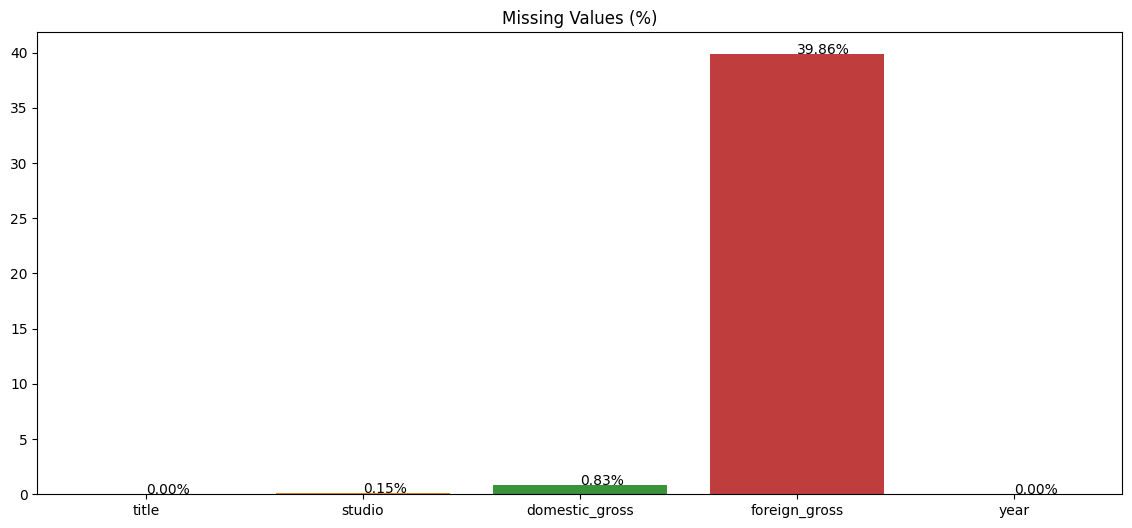

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

def visualize_missing_values(df):
    """
    This function takes in a Pandas DataFrame and returns a visualization of missing values as percentages.

    Args:
        df (pd.DataFrame): The Pandas DataFrame to visualize.

    Returns:
        None.
    """

    # Calculate the percentage of missing values for each column
    total_records = df.shape[0]
    missing_percentages = (df.isnull().sum() / total_records) * 100

    # Create a bar chart of the missing values percentages using Seaborn
    plt.figure(figsize=(14, 6))
    sns.barplot(x=missing_percentages.index, y=missing_percentages)
    plt.title("Missing Values (%)")
    for i in range(len(missing_percentages)):
        plt.annotate(f"{missing_percentages[i]:.2f}%", (i, missing_percentages[i]))

    # Check for duplicate rows
    duplicate_rows = df[df.duplicated()]

    # Display the duplicate rows if any
    if duplicate_rows.shape[0] > 0:
        print("Duplicate Rows:")
        display(duplicate_rows)
    else:
        print("No duplicate rows found.")


    # Display the DataFrame (only the first five records)
    display_side_by_side(df.head(), duplicate_rows)  # Empty DataFrame to add space
    plt.show()

def display_side_by_side(*args):
    """
    Display multiple DataFrames side by side.

    Args:
        *args: Variable number of DataFrames.

    Returns:
        None.
    """

    html_str = ""
    for df in args:
        html_str += df.to_html()
    display(HTML(html_str))

# if __name__ == "__main__":
    

# Visualize the missing values as percentages and display the first five records of DataFrame
visualize_missing_values(bom_movie_gross_df)



- **3 out of the 5 columns in this dataset contain null values. The `studio` column has the least null values.**
- **As for the `domestic gross` , `foreign_gross` and `year` columns, I will drop them as they are present in another more granular dataset.**
- **All other columns i.e `title` and `studio` columns will be dropped especially cosidering the `stuido` coulumn has so many categorical values presenting a high cardinality problem.**

### Data Cleaning & Preparation for the `IMDB Basic Names` dataset.

No duplicate rows found.


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles


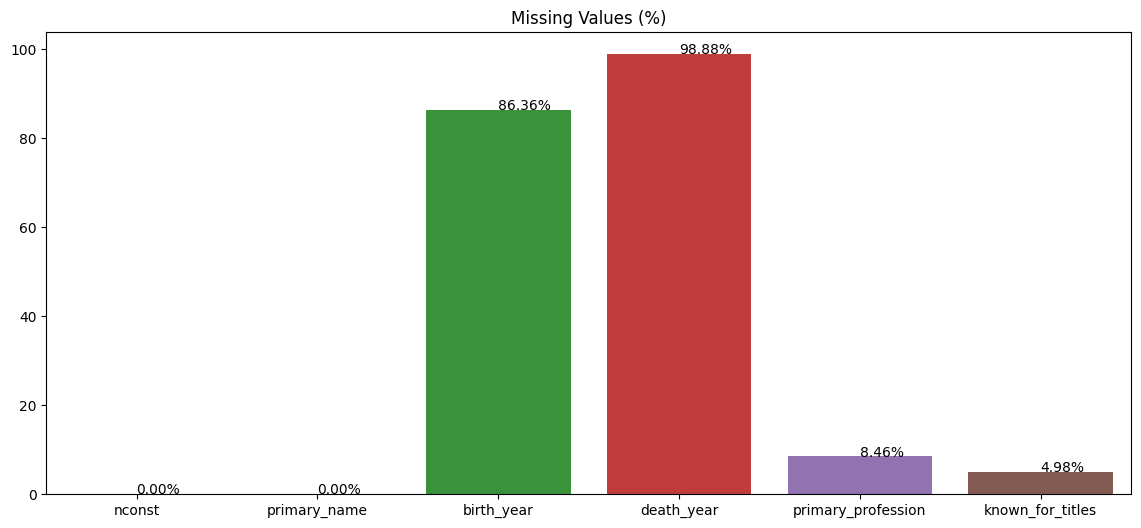

In [14]:
visualize_missing_values(IMDB_name_basics_df)

**Not much information from the above dataset. This primariy crew information that is not going to be instrumental in our analysis.**

### Data Cleaning & Preparation for the `IMDB Original Titles` dataset.

No duplicate rows found.


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
,title_id,ordering,title,region,language,types,attributes,is_original_title


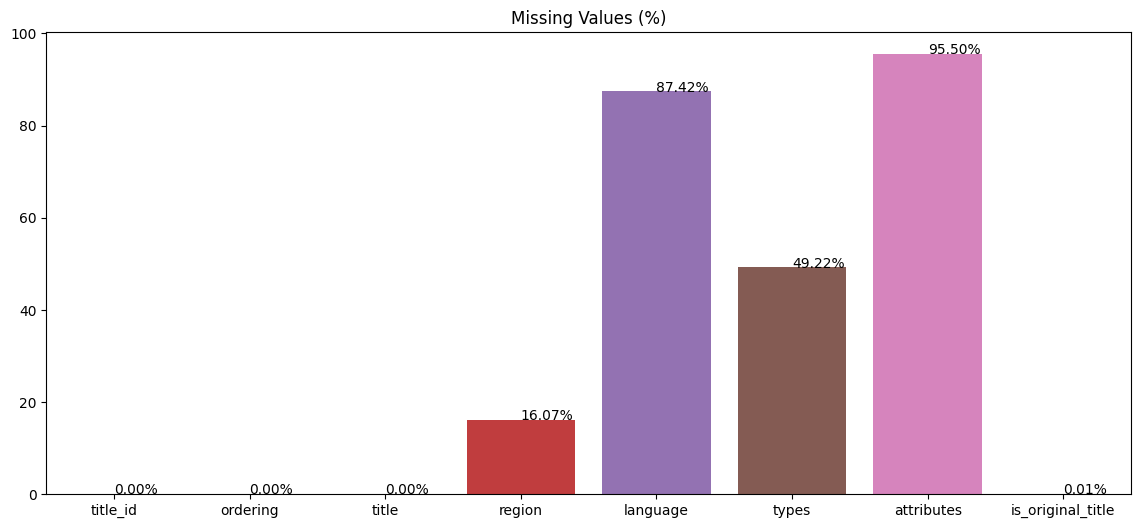

In [15]:
visualize_missing_values(IMDB_title_akas_df)

**The dataset above indicates the original language of each film. However, this information is not relevant for our analysis, since we have another dataset with the titles translated into English. We also observe that some title_ids are repeated, because a film has both an original name and an alternative name. For example, title_id `tt0063540`` has five entries.**

- 0	tt0063540	Sunghursh	Sunghursh	2013	175.0	Action,Crime,Drama
- 1	tt0066787	One Day Before the Rainy Season	Ashad Ka Ek Din	2019	114.0	Biography,Drama
- 2	tt0069049	The Other Side of the Wind	The Other Side of the Wind	2018	122.0	Drama
- 3	tt0069204	Sabse Bada Sukh	Sabse Bada Sukh	2018	NaN	Comedy,Drama
- 4	tt0100275	The Wandering Soap Opera	La Telenovela Errante	2017	80.0	Comedy,Drama,Fantasy

### ⭐ Data Cleaning & Preparation for the `IMDB Basics Titles` dataset.

No duplicate rows found.


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
,tconst,primary_title,original_title,start_year,runtime_minutes,genres


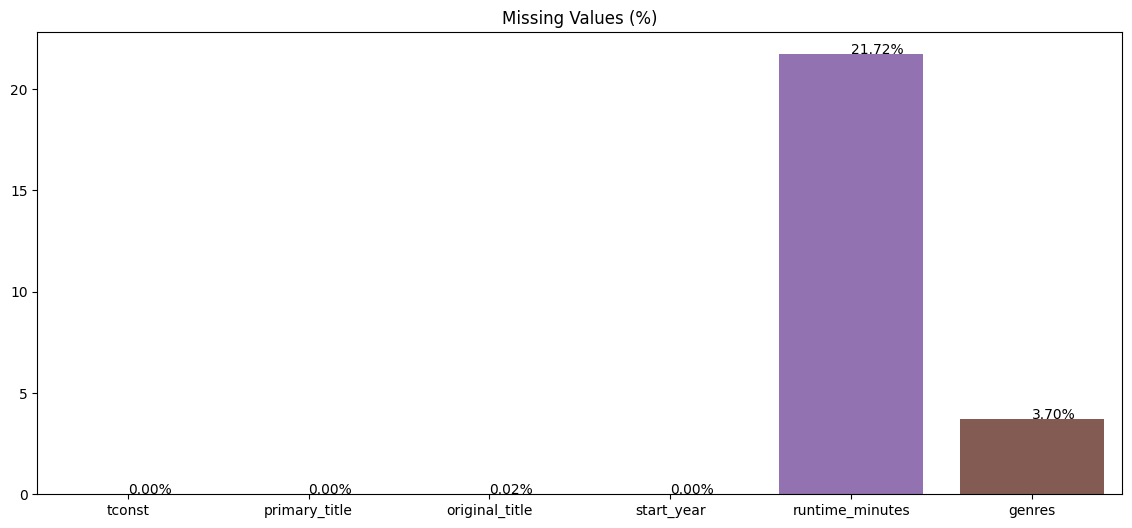

In [16]:
visualize_missing_values(df_IMDB_title_basics_df)

- **The columns `runtime_minutes` and `genres` have missing values in 21.72% and 3.70% of the cases, respectively. Since these proportions are relatively low, we can safely remove the corresponding rows from the data set. This is a reasonable approach to handle missing data in these variables. Another appraoch is to drop columns that would not be instrumental in our analysis.**
- **The `primary_title` is in English and this is what we are interested in. We shall keep this column and drop the `original_title` as they are more or less the same thing. We can also note that the `original_title` has some missing value but not a significant amount but none the less we will still drop this column.**

In [17]:
# drop the columns not needed for analysis
df_IMDB_title_basics_df.drop(columns=['original_title','tconst','start_year','runtime_minutes'], inplace=True)

# check for the number of duplicate values
print("There are:", df_IMDB_title_basics_df.duplicated().sum(), "duplicated values")

# drop the duplicate values
df_IMDB_title_basics_df = df_IMDB_title_basics_df.drop_duplicates(subset=None, keep='first')
display(df_IMDB_title_basics_df.duplicated().any())

# change the column values to lower case for consistency
df_IMDB_title_basics_df['primary_title'] = df_IMDB_title_basics_df['primary_title'].str.lower()
df_IMDB_title_basics_df['genres'] = df_IMDB_title_basics_df['genres'].str.lower()

# rename the column Primay_title to movie_title
df_IMDB_title_basics_df.rename(columns={'primary_title': 'movie_title'}, inplace=True)

# dropping missing values in the `genres` column
df_IMDB_title_basics_df.dropna(inplace=True)

# change all multiple genre observations into the string "cross-genre"
df_IMDB_title_basics_df['genres'] = df_IMDB_title_basics_df['genres'].apply(lambda x: 'cross-genre' if ',' in x else x)

df_IMDB_title_basics_df.info()

display(df_IMDB_title_basics_df.head())

There are: 1665 duplicated values


False

<class 'pandas.core.frame.DataFrame'>
Index: 139123 entries, 0 to 146143
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   movie_title  139123 non-null  object
 1   genres       139123 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB


,movie_title,genres
0,sunghursh,cross-genre
1,one day before the rainy season,cross-genre
2,the other side of the wind,drama
3,sabse bada sukh,cross-genre
4,the wandering soap opera,cross-genre


### Data Cleaning & Preparation for the `IMDB Crew Titles` dataset.

No duplicate rows found.


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
,tconst,directors,writers


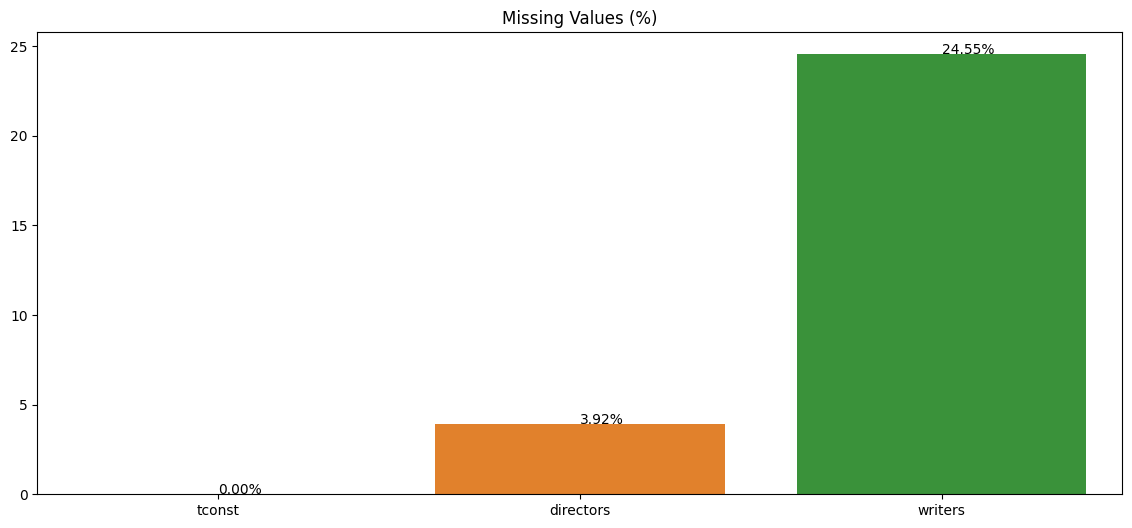

In [18]:
visualize_missing_values(IMDB_title_crew_df)

**Not much context from this dataset s well. This will not be instrumental for our analysis.**

### Data Cleaning & Preparation for the `IMDB Principal Titles` dataset.

No duplicate rows found.


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
,tconst,ordering,nconst,category,job,characters


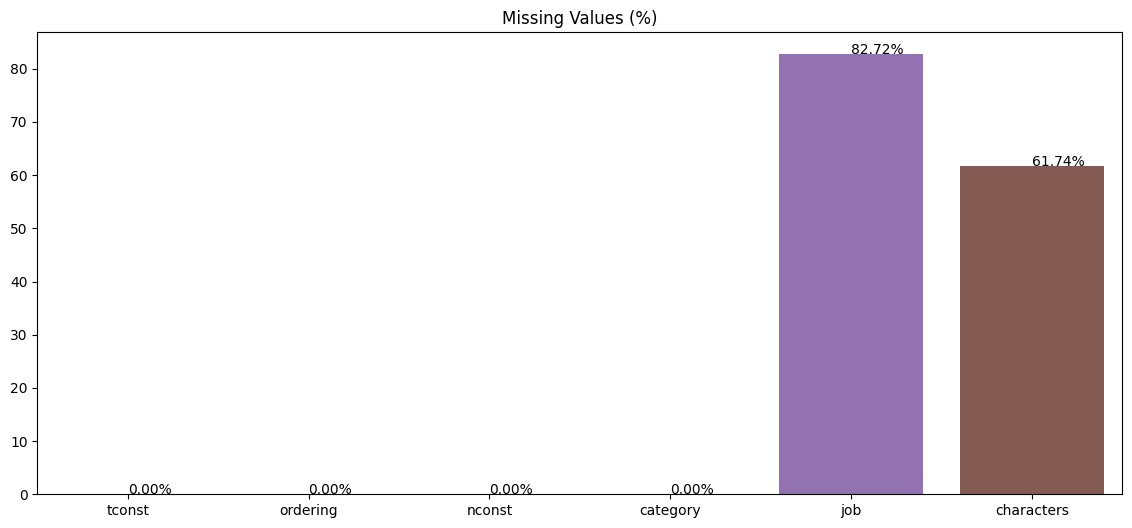

In [19]:
visualize_missing_values(IMDB_title_principals_df)

**This dataset has limited contextual information, which affects the quality of our analysis. We can join this dataset with other datasets such as `IMDB Crew Titles`, `IMDB Ratings`, or `IMDB Basic Names` using the `tconst` and `nconst` columns. However, this may not provide much relevant context, as these datasets mainly contain information about the movie staff. Moreover, this may result in a high cardinality dataset, since one person can have multiple roles and credits in different movies.**

### Data Cleaning & Preparation for the `IMDB Ratings` dataset.

No duplicate rows found.


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
,tconst,averagerating,numvotes


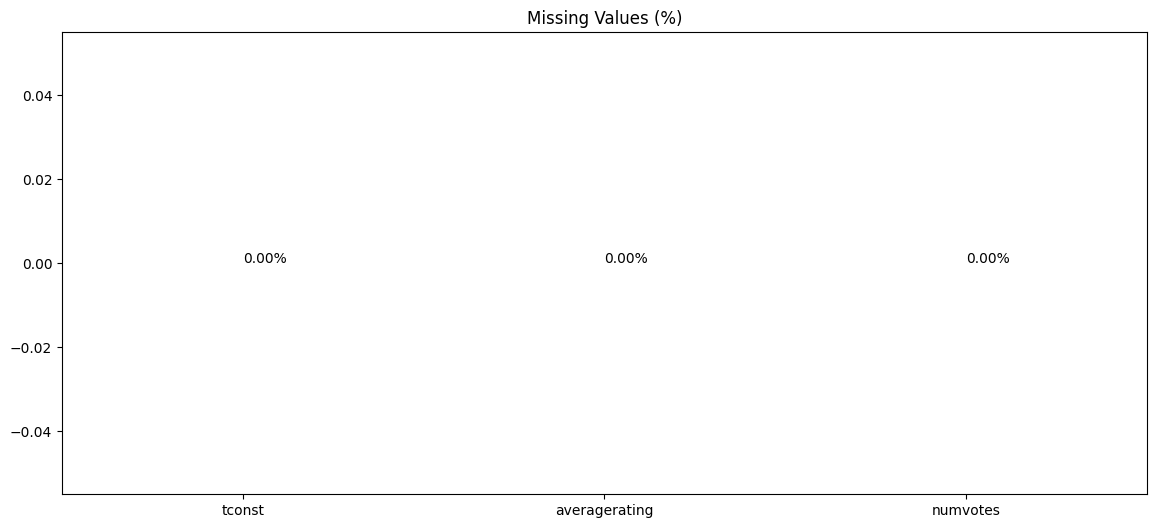

In [20]:
visualize_missing_values(IMDB_ratings_df)

**The `TMDB Movies` dataset provides more granular information on the `averagerating` and `numvotes` columns. Therefore, this dataset does not offer any additional value for our analysis.**

### Data Cleaning & Preparation for the `Rotten Tomatoes Movies Info` dataset.

Duplicate Rows:


,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1195,NaN,NR,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1758,A group of air crash survivors are stranded in...,PG-13,Action and Adventure|Drama,NaN,Edward Burns|Scott Frank,"Dec 17, 2004","Mar 1, 2005",$,"20,900,803",112 minutes,20th Century Fox
1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police drama earned five Academy Awards, including Best Picture, Best Adapted Screenplay (written by Ernest Tidyman), and Best Actor (Gene Hackman). Jimmy ""Popeye"" Doyle (Hackman) and his partner, Buddy Russo (Roy Scheider), are New York City police detectives on narcotics detail, trying to track down the source of heroin from Europe into the United States. Suave Alain Charnier (Fernando Rey) is the French drug kingpin who provides a large percentage of New York City's dope, and Pierre Nicoli (Marcel Bozzuffi) is a hired killer and Charnier's right-hand man. Acting on a hunch, Popeye and Buddy start tailing Sal Boca (Tony Lo Bianco) and his wife, Angie (Arlene Faber), who live pretty high for a couple whose corner store brings in about 7,000 dollars a year. It turns out Popeye's suspicions are right -- Sal and Angie are the New York agents for Charnier, who will be smuggling 32 million dollars' worth of heroin into the city in a car shipped over from France. The French Connection broke plenty of new ground for screen thrillers; Popeye Doyle was a highly unusual ""hero,"" an often violent, racist, and mean-spirited cop whose dedication to his job fell just short of dangerous obsession. The film's high point, a high-speed car chase with Popeye tailing an elevated train, was one of the most viscerally exciting screen moments of its day and set the stage for dozens of action sequences to follow. And the film's grimy realism (and downbeat ending) was a big change from the buff-and-shine gloss and good-guys-always-win heroics of most police dramas that preceded it. The French Connection was inspired by a true story, and Eddie Egan and Sonny Grosso, Popeye and Buddy's real life counterparts, both have small roles in the film. A sequel followed four years later.",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Packer, a 28 year-old finance golden boy dreaming of living in a civilization ahead of this one, watches a dark shadow cast over the firmament of the Wall Street galaxy, of which he is the uncontested king. As he is chauffeured across midtown Manhattan to get a haircut at his father's old barber, his anxious eyes are glued to the yuan's exchange rate: it is mounting against all expectations, destroying Eric's bet against it. Eric Packer is losing his empire with every tick of the clock. Meanwhile, an eruption of wild activity unfolds in the city's streets. Petrified as the threats of the real world infringe upon his cloud of virtual convictions, his paranoia intensifies during the course of his 24-hour cross-town odyssey. Packer starts to piece together clues that lead him to a most terrifying secret: his imminent assassination. -- (C) Official Site",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,"Illeana Douglas delivers a superb performance as Denise Waverly, a fictional singer and songwriter whose life bears more than a passing resemblance to that of real-life pop star Carole King. Edna Buxton, the daughter of a Philadelphia steel tycoon, aspires to a career as a singer, and when against her mother's bidding she sings a sultry version of ""Hey There (You With the Stars in Your Eyes)"" (instead of Mom's choice, ""You'll Never Walk Alone"") at a talent contest, she wins a recording contact and moves to New York City. She cuts a record and gains a new stage name, Denise Waverly; however, she soon finds that girl singers are a dime a dozen in the Big Apple and her career as a vocalist goes nowhere. But she has a knack for writing songs, and eccentric producer Joel Milner (John Turturro) asks her to pen some songs for his upcoming projects. Teamed with 

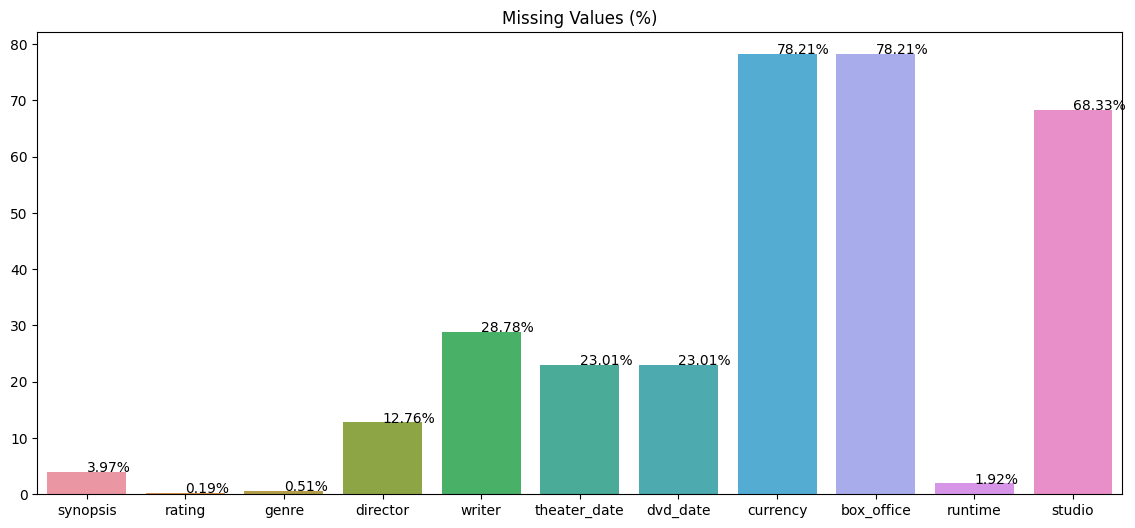

In [21]:
visualize_missing_values(rt_movie_info_df)

**Not much we work work with from the above dataset. The columns : `rating`, `genre`, `director`, `writer`, `theater_date`, `dvd_date`, `box_office`, `runtime`, `studio` have already been derived from the other datasets.**

### ⭐ Data Cleaning & Preparation for the `TMDB Movies` dataset.

No duplicate rows found.


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count


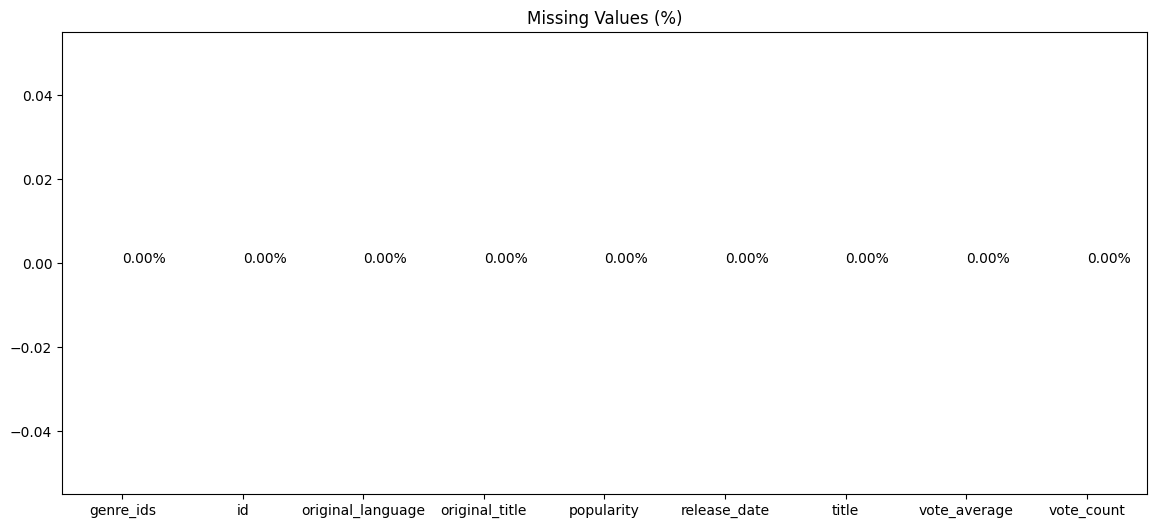

In [22]:
visualize_missing_values(tmdb_movies_df.head())

**- At first glance we scan see that there aren't any missing values in this dataset.**
**- However, we can see that the `release_date` column is also present in another datset and this would just create two date/time columns (one in 'X' and another in 'Y'). We will go ahead and drop this column.**

In [23]:
# convert the release_date column to datetime
# tmdb_movies_df['release_date'] = pd.to_datetime(tmdb_movies_df['release_date'])

# checking for duplicate values
tmdb_movies_df.duplicated().sum()

# drop the duplicate values and display the result
tmdb_movies_df.drop_duplicates(subset=None, keep='first', inplace=True)
display(tmdb_movies_df.duplicated().any())

# drop the columns not neceswary for analysis
tmdb_movies_df.drop(columns=['genre_ids','id','original_title', 'release_date'], inplace=True)

# change the column values to lower case for consistency
tmdb_movies_df['original_language'] = tmdb_movies_df['original_language'].str.lower()
tmdb_movies_df['title'] = tmdb_movies_df['title'].str.lower()

# rename the title column to movie_title
tmdb_movies_df.rename(columns={'title': 'movie_title'}, inplace=True)

tmdb_movies_df.head()

False

,original_language,popularity,movie_title,vote_average,vote_count
0,en,33.533,harry potter and the deathly hallows: part 1,7.7,10788
1,en,28.734,how to train your dragon,7.7,7610
2,en,28.515,iron man 2,6.8,12368
3,en,28.005,toy story,7.9,10174
4,en,27.920,inception,8.3,22186


### ⭐ Data Cleaning & Preparation for the `TN Movie Budgets` dataset.

No duplicate rows found.


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,


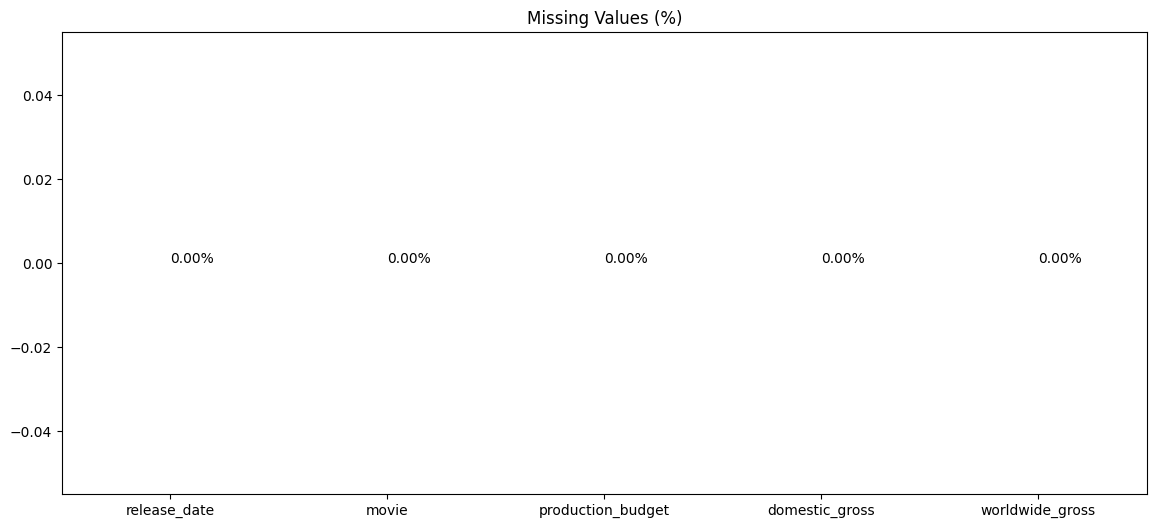

In [24]:
visualize_missing_values(tn_movie_budgets_df)

In [25]:
tn_movie_budgets_df.reset_index(inplace=True)

tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


**Data preparation for the "domestic_gross" column:**
- Remove currency symbols ($)
- Remove thousands separators (,)
- Cast string values to integer type

In [26]:
# get rid of money symbols in the domestic_gross, foreign_gross, and production_budget columns
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(np.int64)

tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(np.int64)

tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(np.int64)

tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [27]:
# convert release_date to date time object 

tn_movie_budgets_df['release_date'] = pd.to_datetime(tn_movie_budgets_df['release_date'])

# Now just retrive the year from the release_date column and rename it to release_year

tn_movie_budgets_df['release_year'] = tn_movie_budgets_df['release_date'].dt.year

# Now just retrive the month from the release_date column and rename it to release_month

tn_movie_budgets_df['release_month'] = tn_movie_budgets_df['release_date'].dt.month

# drop unnecessary columns
tn_movie_budgets_df.drop(columns = ['id', 'domestic_gross'], inplace=True)

# lower case column values for consistency
tn_movie_budgets_df['movie'] = tn_movie_budgets_df['movie'].str.lower()

# check for duplicate values
display(tn_movie_budgets_df.duplicated().sum())

# rename the movie column to movie_title
tn_movie_budgets_df.rename(columns={'movie': 'movie_title'}, inplace=True)

tn_movie_budgets_df.head()

0

,release_date,movie_title,production_budget,worldwide_gross,release_year,release_month
0,2009-12-18,avatar,425000000,2776345279,2009,12
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000,1045663875,2011,5
2,2019-06-07,dark phoenix,350000000,149762350,2019,6
3,2015-05-01,avengers: age of ultron,330600000,1403013963,2015,5
4,2017-12-15,star wars ep. viii: the last jedi,317000000,1316721747,2017,12


>**VERDICT:** 3 datsets

**Merging Datasets.**

**To ensure that every row contains information on the same movies across the three datasets, we will perform an inner join on the 'movie_title' column.**

In [28]:
df_record_merged = tmdb_movies_df.merge(tn_movie_budgets_df, on='movie_title')
df_record_merged.head()

,original_language,popularity,movie_title,vote_average,vote_count,release_date,production_budget,worldwide_gross,release_year,release_month
0,en,28.734,how to train your dragon,7.7,7610,2010-03-26,165000000,494870992,2010,3
1,en,28.515,iron man 2,6.8,12368,2010-05-07,170000000,621156389,2010,5
2,en,28.005,toy story,7.9,10174,1995-11-22,30000000,364545516,1995,11
3,en,27.920,inception,8.3,22186,2010-07-16,160000000,835524642,2010,7
4,en,26.691,percy jackson & the olympians: the lightning t...,6.1,4229,2010-02-12,95000000,223050874,2010,2


In [29]:
df_record_merged = df_record_merged.merge(df_IMDB_title_basics_df, on='movie_title')
df_record_merged.head()

,original_language,popularity,movie_title,vote_average,vote_count,release_date,production_budget,worldwide_gross,release_year,release_month,genres
0,en,28.734,how to train your dragon,7.7,7610,2010-03-26,165000000,494870992,2010,3,cross-genre
1,en,28.515,iron man 2,6.8,12368,2010-05-07,170000000,621156389,2010,5,cross-genre
2,en,27.920,inception,8.3,22186,2010-07-16,160000000,835524642,2010,7,cross-genre
3,en,26.691,percy jackson & the olympians: the lightning t...,6.1,4229,2010-02-12,95000000,223050874,2010,2,cross-genre
4,en,26.526,avatar,7.4,18676,2009-12-18,425000000,2776345279,2009,12,horror


In [30]:
df_record_merged[df_record_merged['movie_title'] == 'avatar']

,original_language,popularity,movie_title,vote_average,vote_count,release_date,production_budget,worldwide_gross,release_year,release_month,genres
4,en,26.526,avatar,7.4,18676,2009-12-18,425000000,2776345279,2009,12,horror


In [31]:
df_record_merged[df_record_merged.duplicated(subset=['movie_title'])]

,original_language,popularity,movie_title,vote_average,vote_count,release_date,production_budget,worldwide_gross,release_year,release_month,genres
9,en,22.020,alice in wonderland,6.6,8713,2010-03-05,200000000,1025491110,2010,3,documentary
10,en,22.020,alice in wonderland,6.6,8713,2010-03-05,200000000,1025491110,2010,3,cross-genre
11,en,22.020,alice in wonderland,6.6,8713,1951-07-28,3000000,0,1951,7,cross-genre
12,en,22.020,alice in wonderland,6.6,8713,1951-07-28,3000000,0,1951,7,documentary
13,en,22.020,alice in wonderland,6.6,8713,1951-07-28,3000000,0,1951,7,cross-genre
...,...,...,...,...,...,...,...,...,...,...,...
3816,en,0.600,the box,8.0,1,2009-11-06,25000000,34356760,2009,11,thriller
3817,en,0.600,the box,6.0,1,2009-11-06,25000000,34356760,2009,11,drama
3818,en,0.600,the box,6.0,1,2009-11-06,25000000,34356760,2009,11,cross-genre
3819,en,0.600,the box,6.0,1,2009-11-06,25000000,34356760,2009,11,thriller


**We can already notice duplicate movies in the movie_title column. We will drop these duplicates.**

In [32]:
# Apply the groupby method to the movie data and select the first row of each group as the representative sample.

df_record_merged = df_record_merged.groupby('movie_title').first().reset_index()

df_record_merged.head()

,movie_title,original_language,popularity,vote_average,vote_count,release_date,production_budget,worldwide_gross,release_year,release_month,genres
0,#horror,de,6.099,3.3,102,2015-11-20,1500000,0,2015,11,cross-genre
1,10 cloverfield lane,en,17.892,6.9,4629,2016-03-11,5000000,108286422,2016,3,cross-genre
2,10 days in a madhouse,en,0.955,5.4,7,2015-11-11,12000000,14616,2015,11,drama
3,12 strong,en,13.183,5.6,1312,2018-01-19,35000000,71118378,2018,1,cross-genre
4,12 years a slave,en,16.493,7.9,6631,2013-10-18,20000000,181025343,2013,10,cross-genre


In [33]:
df_record_merged[df_record_merged.duplicated(subset=['movie_title'])]

,movie_title,original_language,popularity,vote_average,vote_count,release_date,production_budget,worldwide_gross,release_year,release_month,genres


In [34]:
# Export the cleaned data to a csv file

df_record_merged.to_csv('cleaned_data.csv', index=False)

## <font color='goldenrod'>4. Exploratory Data Analysis</font>

### Univariate Data Analysis.

In [35]:
# load the cleaned data

df = pd.read_csv('cleaned_data.csv')

df.head()

,movie_title,original_language,popularity,vote_average,vote_count,release_date,production_budget,worldwide_gross,release_year,release_month,genres
0,#horror,de,6.099,3.3,102,2015-11-20,1500000,0,2015,11,cross-genre
1,10 cloverfield lane,en,17.892,6.9,4629,2016-03-11,5000000,108286422,2016,3,cross-genre
2,10 days in a madhouse,en,0.955,5.4,7,2015-11-11,12000000,14616,2015,11,drama
3,12 strong,en,13.183,5.6,1312,2018-01-19,35000000,71118378,2018,1,cross-genre
4,12 years a slave,en,16.493,7.9,6631,2013-10-18,20000000,181025343,2013,10,cross-genre


In [36]:
# Below are the descriptive statistics for the cleaned data
df.describe()


,popularity,vote_average,vote_count,production_budget,worldwide_gross,release_year,release_month
count,1834.000000,1834.000000,1834.000000,1.834000e+03,1.834000e+03,1834.000000,1834.000000
mean,10.764949,6.172901,1662.547437,3.910817e+07,1.210447e+08,2012.401309,6.884406
std,8.069924,1.093891,2648.885734,5.264722e+07,2.252923e+08,6.498337,3.482909
min,0.600000,0.000000,1.000000,9.000000e+03,0.000000e+00,1927.000000,1.000000
25%,5.972250,5.600000,79.000000,5.000000e+06,3.489978e+06,2011.000000,4.000000
50%,9.488500,6.200000,619.500000,2.000000e+07,3.792477e+07,2013.000000,7.000000
75%,14.329250,6.800000,2038.250000,4.900000e+07,1.249645e+08,2015.000000,10.000000
max,80.773000,10.000000,22186.000000,4.250000e+08,2.776345e+09,2019.000000,12.000000


**Insights:**

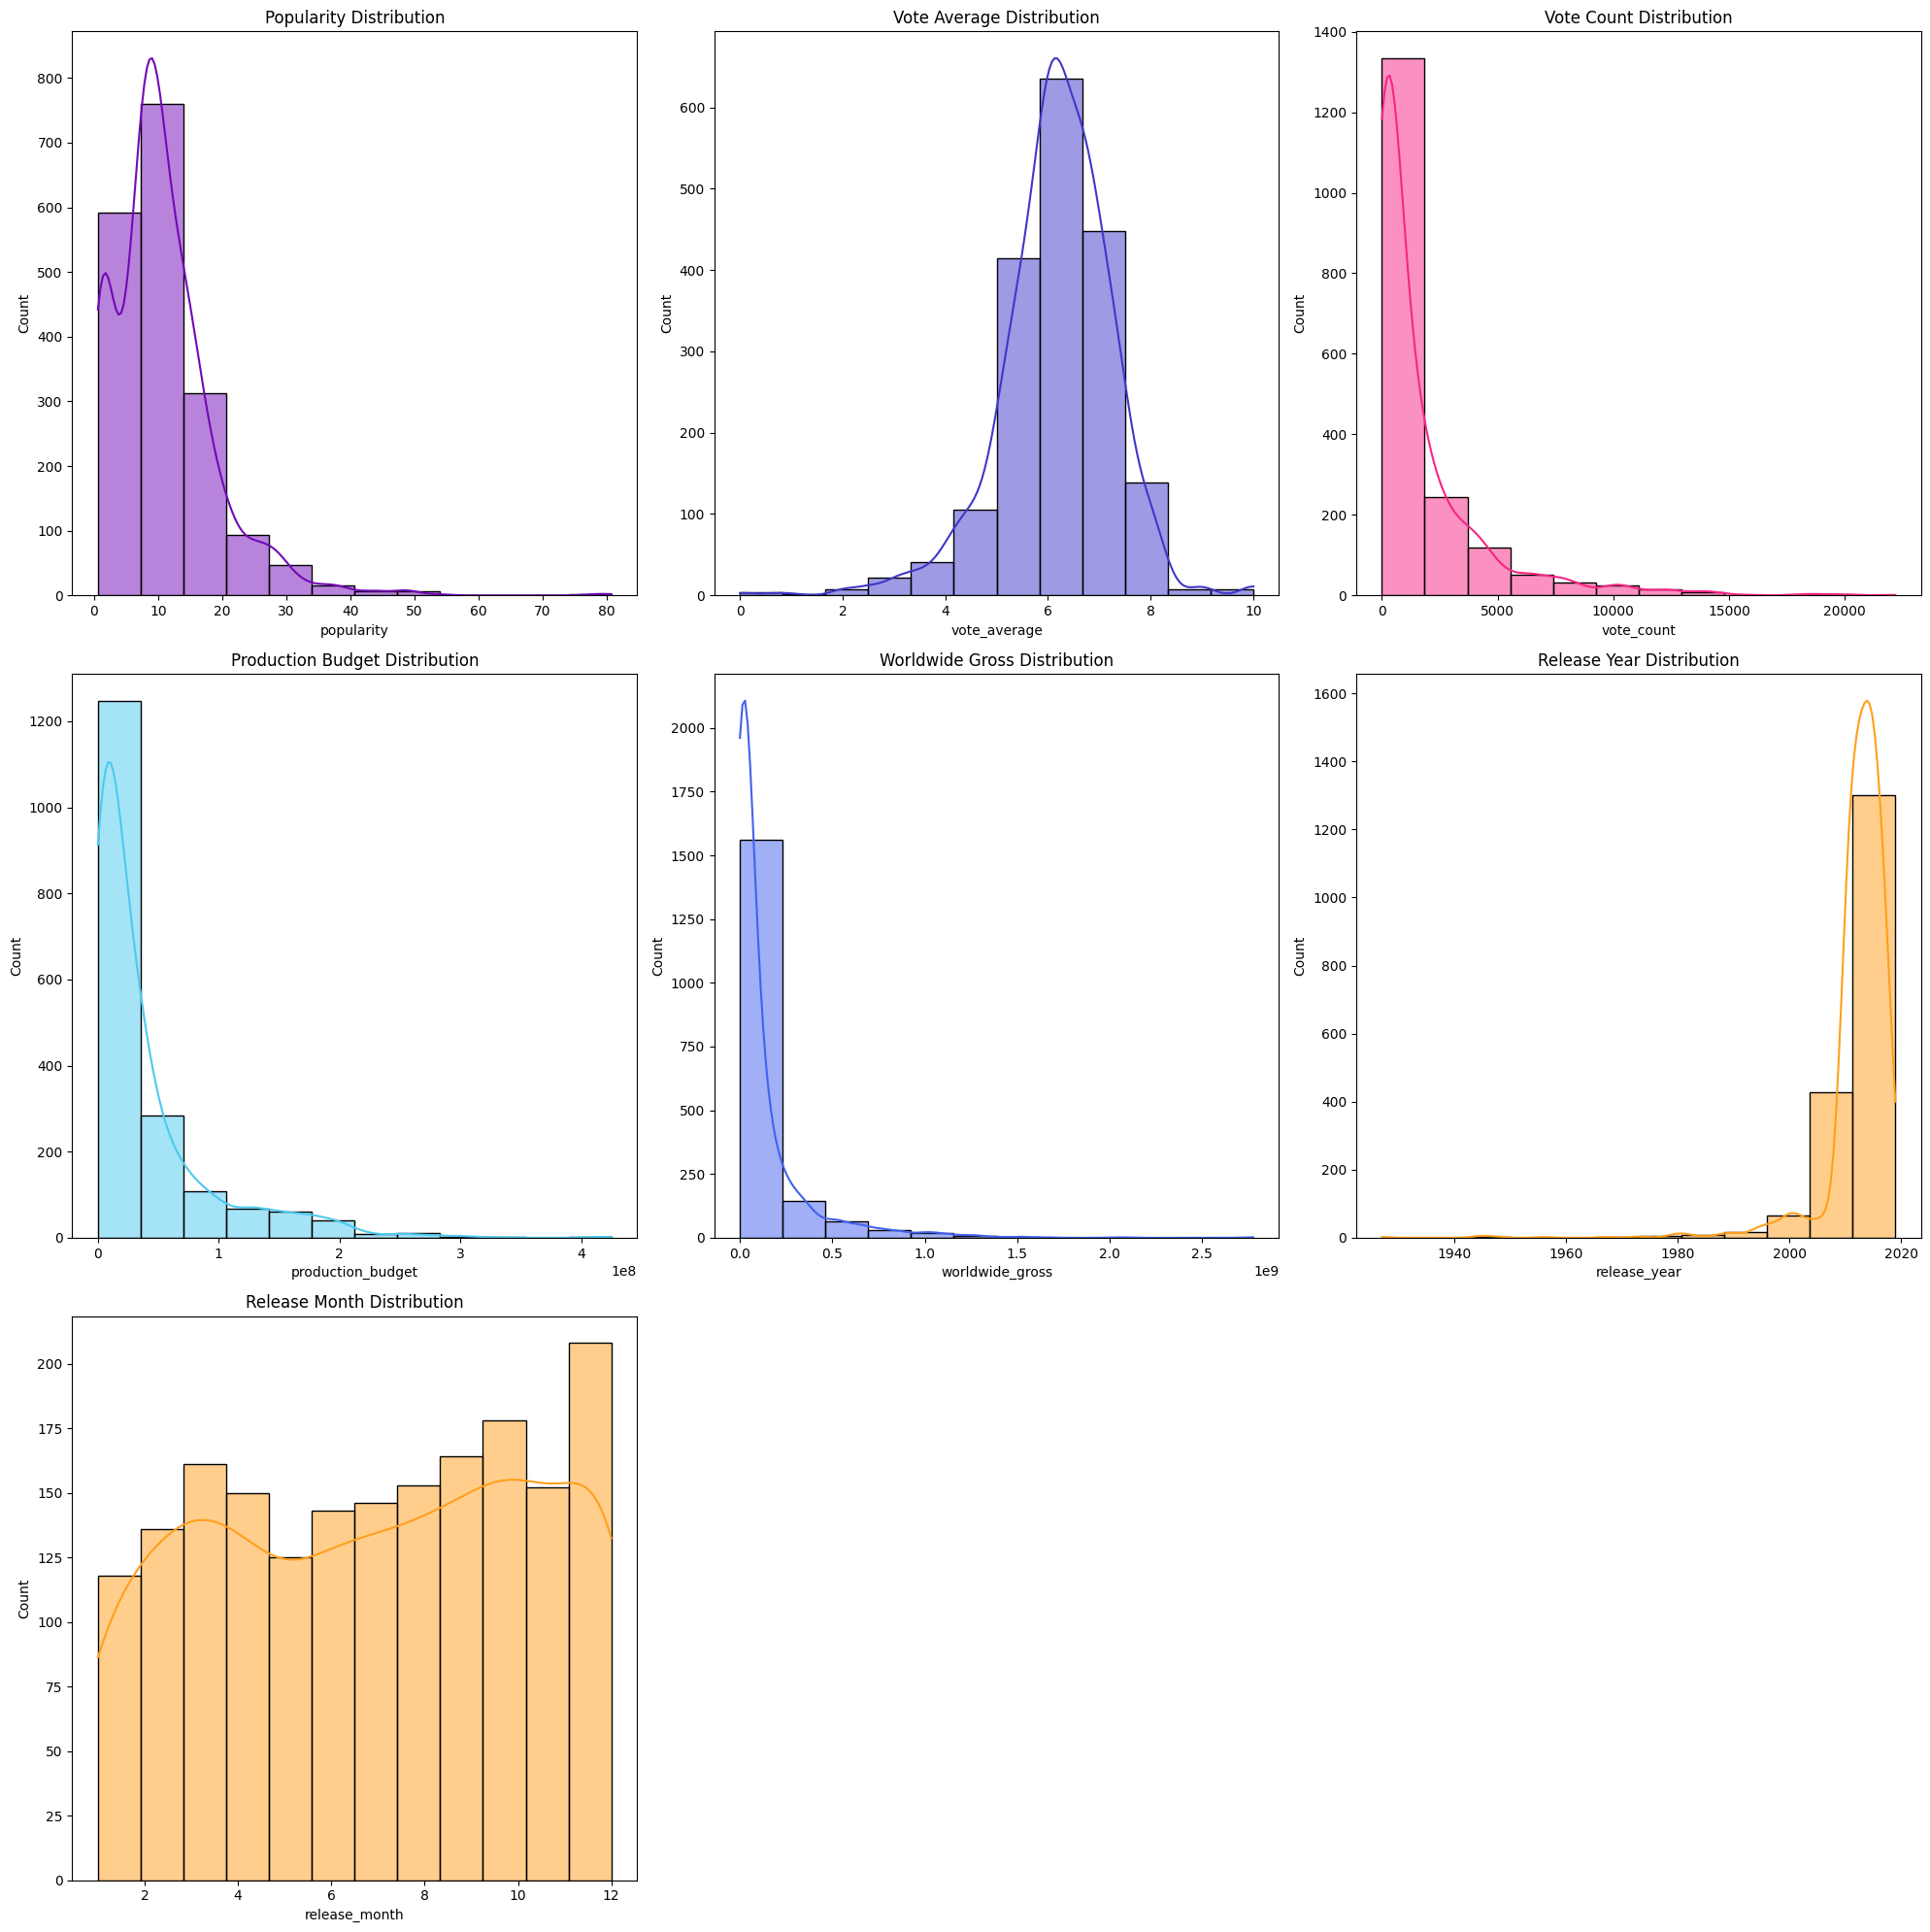

In [37]:
# Visualize the distribution plot
import math

plt.figure(figsize = (20,20))

plt.subplot(3, 3, 1)
# Sturges’ Rule to be used in determining the optimal number of bins
n_bins = int(np.ceil(np.log2(len(df)) + 1))

sns.histplot(x=df['popularity'], color='#7209b7', bins=n_bins, kde=True)
plt.title('Popularity Distribution')

plt.subplot(3, 3, 2)
sns.histplot(x=df['vote_average'], color='#3f37c9', bins=12, kde=True)
plt.title('Vote Average Distribution')

plt.subplot(3, 3, 3)
sns.histplot(x=df['vote_count'], color='#f72585', bins=12, kde=True)
plt.title('Vote Count Distribution')

plt.subplot(3, 3, 4)
sns.histplot(x=df['production_budget'], color='#4cc9f0', bins=12, kde=True)
plt.title('Production Budget Distribution')

plt.subplot(3, 3, 5)
sns.histplot(x=df['worldwide_gross'], color='#4361ee', bins=12, kde=True)
plt.title('Worldwide Gross Distribution')


plt.subplot(3, 3, 6)
sns.histplot(x=df['release_year'], color='#ff9f1c', bins=12, kde=True)
plt.title('Release Year Distribution')

plt.subplot(3, 3, 7)
sns.histplot(x=df['release_month'], color='#ff9f1c', bins=12, kde=True)
plt.title('Release Month Distribution')

plt.tight_layout()

# Show the plot
plt.show()

- **The distributions of `popularity`, `vote count`, `production budget`, and `worlwide gross` are all positively skewed. This implies that the mean exceeds the median (which represents the `typical value`) in each case, and that there are many movies with relatively low values and a few outliers with extremely high values. For example, there are more movies with low popularity and low vote count than movies with high popularity and high vote count. Similarly, there are more movies with low production budget and low worldwide gross than movies with high production budget and high worldwide gross.**

- **`vote_average` is almost normally distibuted with a mean of 6.17 and a skew of -0.74. This implies that the mean and median are almost equal, and that there are no extreme outliers. The distribution is slightly skewed to the left, which means that there are more movies with high vote average than movies with low vote average.**

- **`release_year` is extremely skewed to the left. This implies that there are more movies released in recent years than movies released in the past with most of the movies being released around the year `2013'. This could be due to a number of factors, such as the rise of streaming services and the increasing popularity of independent filmmaking.**

- **`release_month` follows a bell-shaped curve that is symmetric around the center, where most of the values are clustered. The skew of -0.10 indicates that the curve has a slight tail to the left, meaning that there are some values that are lower than the average. This also means that the mean is slightly less than the median, which is the middle value of the data. This also implies that there are no extreme values that are very far from the mean, which would affect the shape of the curve and the skewness. We also note that there is a seasonal pattern in the movie release data, where more movies are released in the later months of the year than in the earlier months. This could be due to various factors, such as holidays, awards season, or consumer preferences.**

### Bivariate Data Analysis.

**Question: What is the average production budget per month / year?**

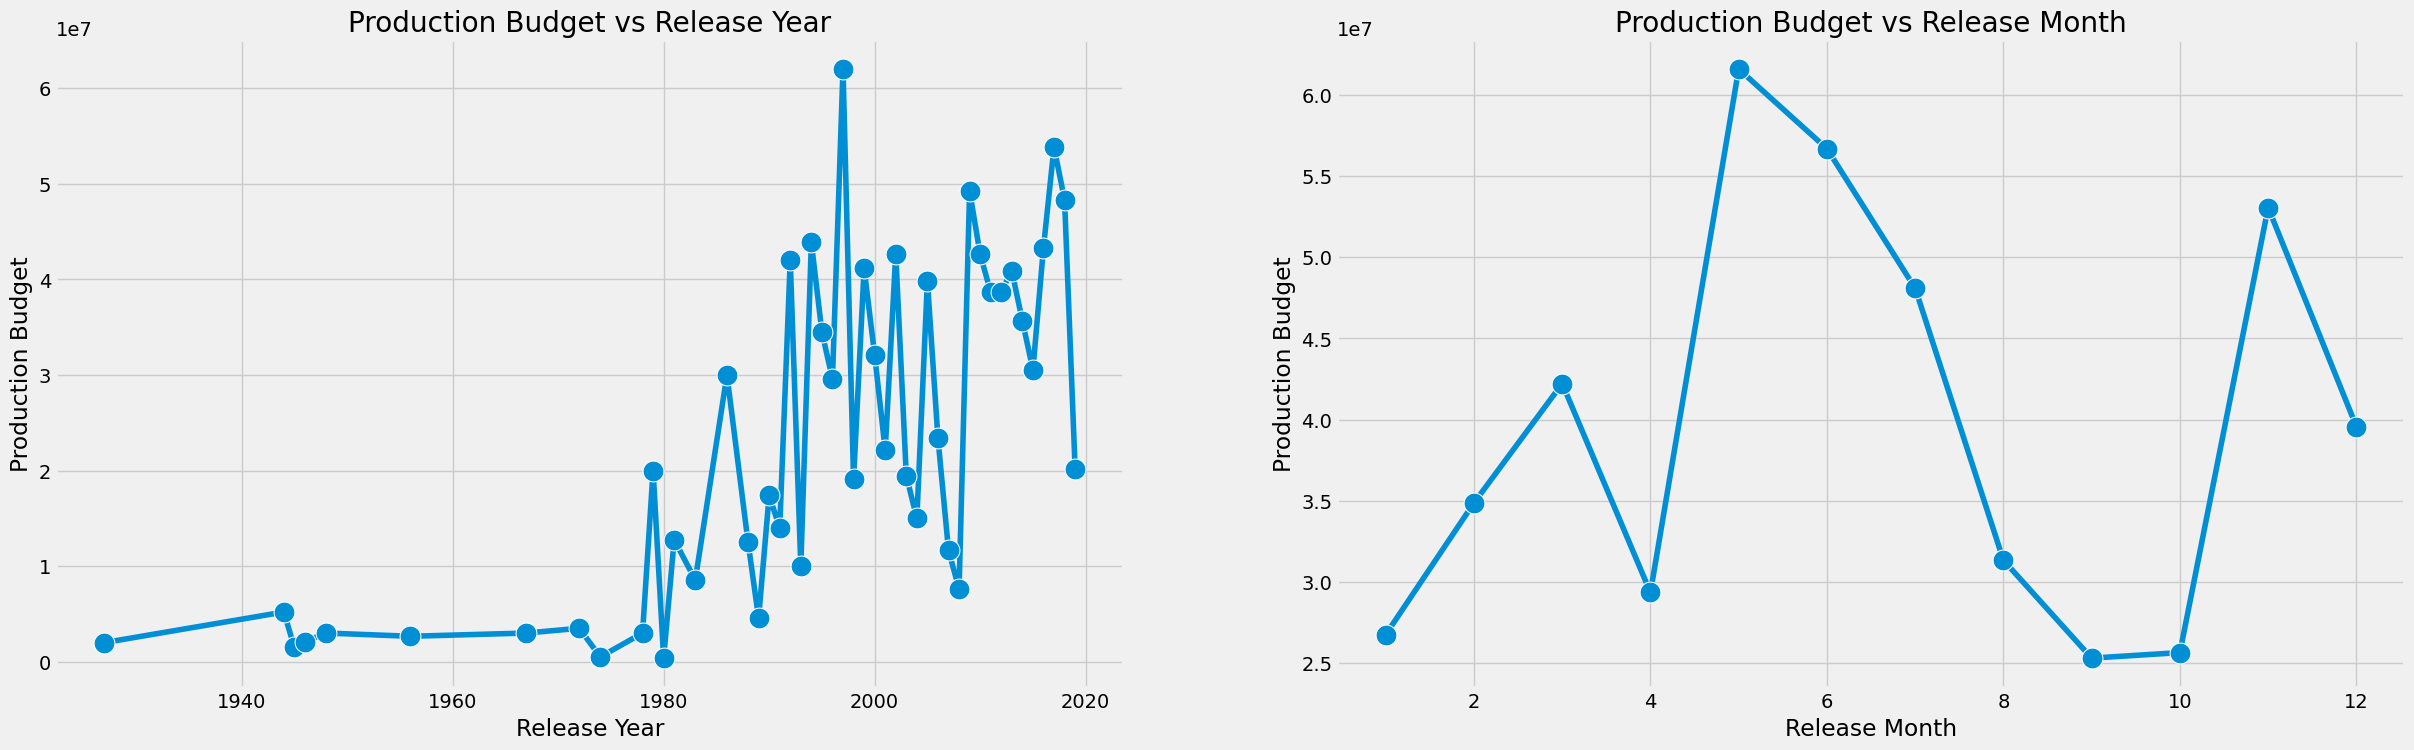

In [38]:
plt.style.use('fivethirtyeight')

grouped_mean_production_budget_year_df = df.groupby('release_year')['production_budget'].mean().reset_index()
grouped_mean_production_budget_month_df = df.groupby('release_month')['production_budget'].mean().reset_index()

fig, ax = plt.subplots(ncols=2, figsize=(27, 8))

sns.lineplot(x='release_year', y='production_budget', data=grouped_mean_production_budget_year_df, marker="o", errorbar=('ci', 0), markersize=15, ax=ax[0])
ax[0].set_title('Production Budget vs Release Year')
ax[0].set_xlabel('Release Year')
ax[0].set_ylabel('Production Budget')

sns.lineplot(x='release_month', y='production_budget', data=grouped_mean_production_budget_month_df, marker="o", errorbar=('ci', 0), markersize=15, ax=ax[1])
ax[1].set_title('Production Budget vs Release Month')
ax[1].set_xlabel('Release Month')
ax[1].set_ylabel('Production Budget')

plt.show()


**Insights:**
- **There seems to be a trend with the porduction budgets overt the years. We can note that in the past, product budgets were relatively low but as the years went by, the budgets increased. This could be due to the fact that the movie industry has become more competitive and the need to produce high quality movies has increased.**
- **This could also be due to a number of factors, including the rising cost of talent, the increasing demand for special effects, and the decline of the market for low-budget films. However, there are still a number of low-budget films being made today, and some of these films have been successful at the box office.**
- **We can see just before we get into the year 2020 there was another shrap decline in the production budgets. The COVID-19 pandemic, which caused widespread economic disruption and led to a decline in consumer demand could be a reason for this decline. This could also be be due to the geopolitical tensions, such as the US-China trade war, which created uncertainty and led to businesses to delay or cancel investment projects.**

- **Production budgets for movies tend to increase bewteen the months of may to june. This could be due to the fact that the summer season is the most popular time for movie releases. This is because people are more likely to go to the movies during the summer months, when the weather is nice and they have more free time.**
- **Another reason could be that many major film festivals take place in May and June, such as the Cannes Film Festival and the Tribeca Film Festival. These festivals can be a great way to generate buzz for a film and attract investors, which could lead to an increase in the production budget.**

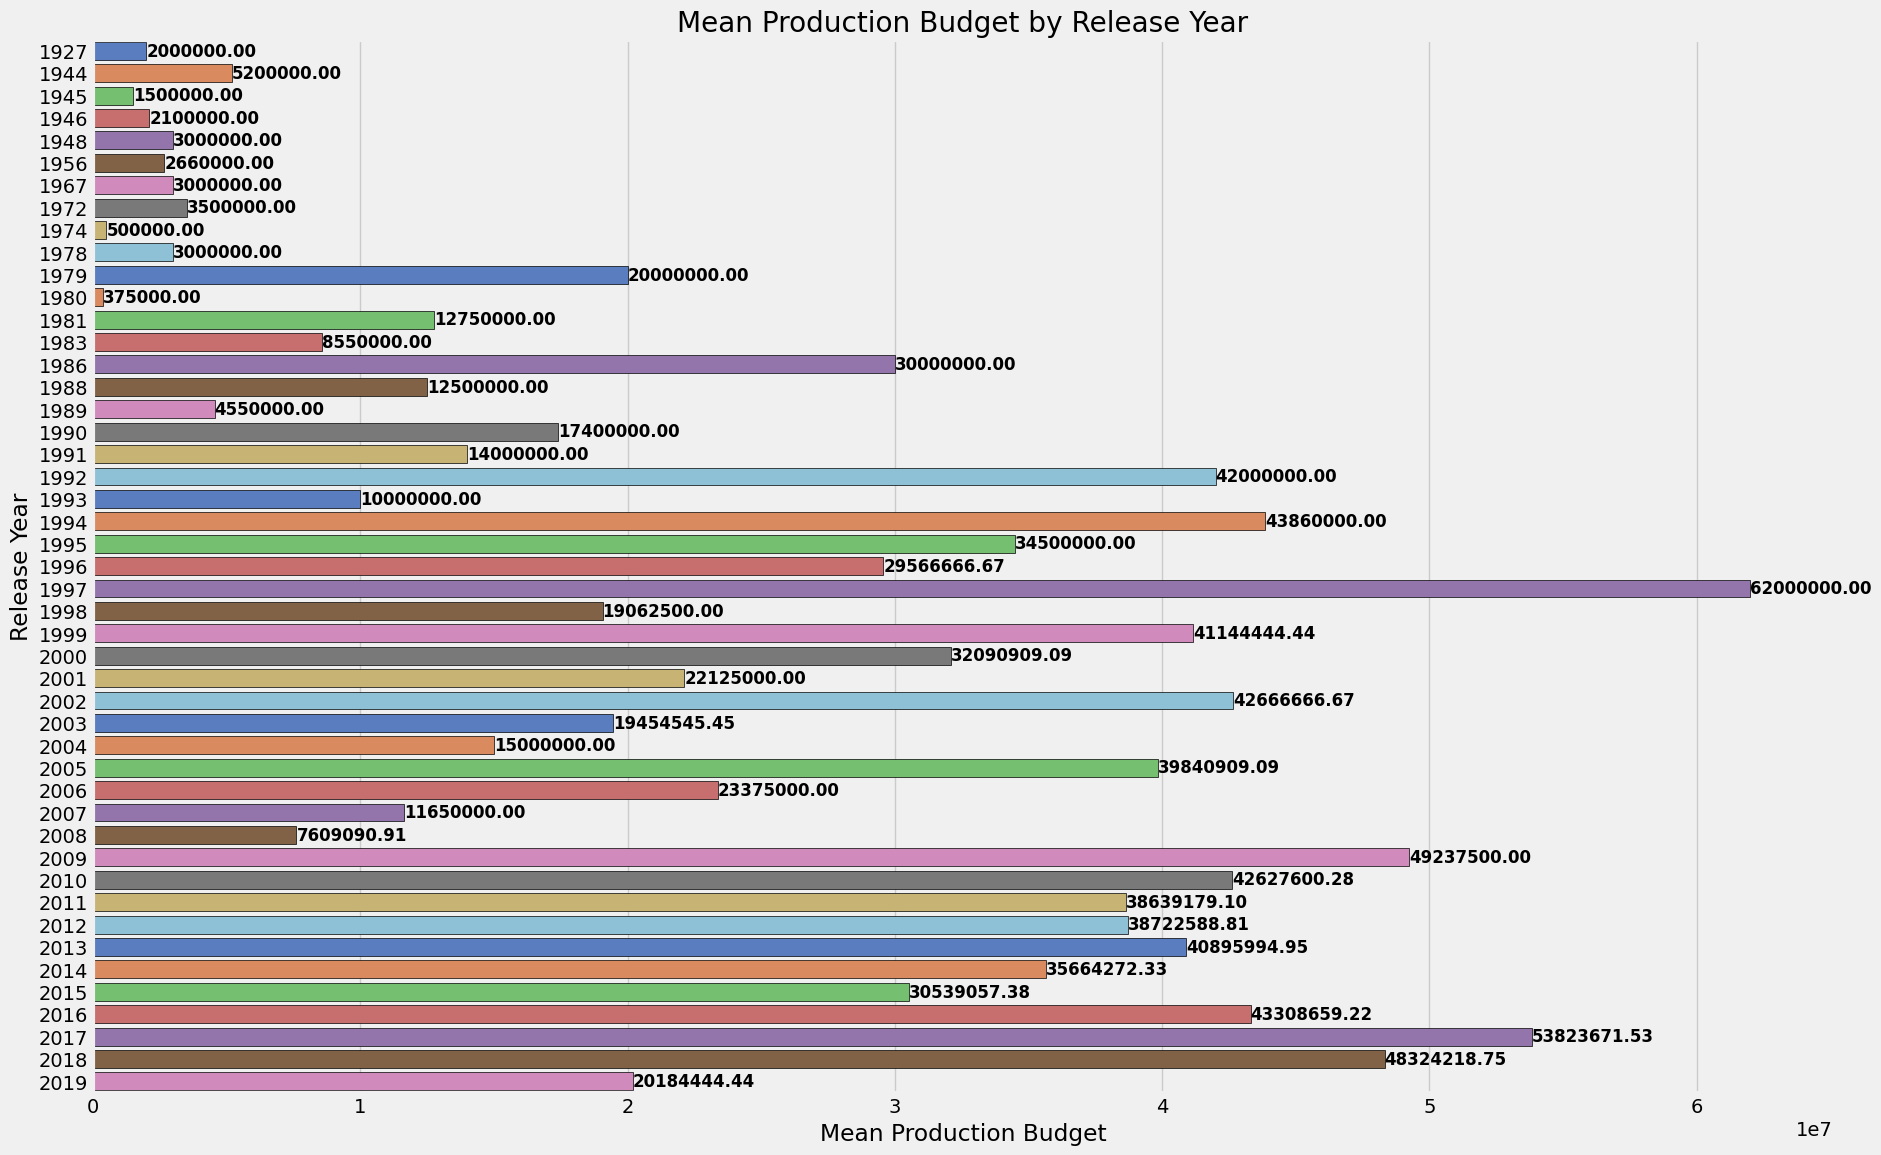

In [39]:
plt.figure(figsize=(20, 13))  # Adjust the figure size for better horizontal display
ax = sns.barplot(x='production_budget', y='release_year', data=grouped_mean_production_budget_year_df, orient='h', edgecolor='black', palette='muted')

# Add annotations beside each bar
for index, value in enumerate(grouped_mean_production_budget_year_df['production_budget']):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=12, weight='bold')

plt.xlabel('Mean Production Budget')
plt.ylabel('Release Year')
plt.title('Mean Production Budget by Release Year')
plt.show()

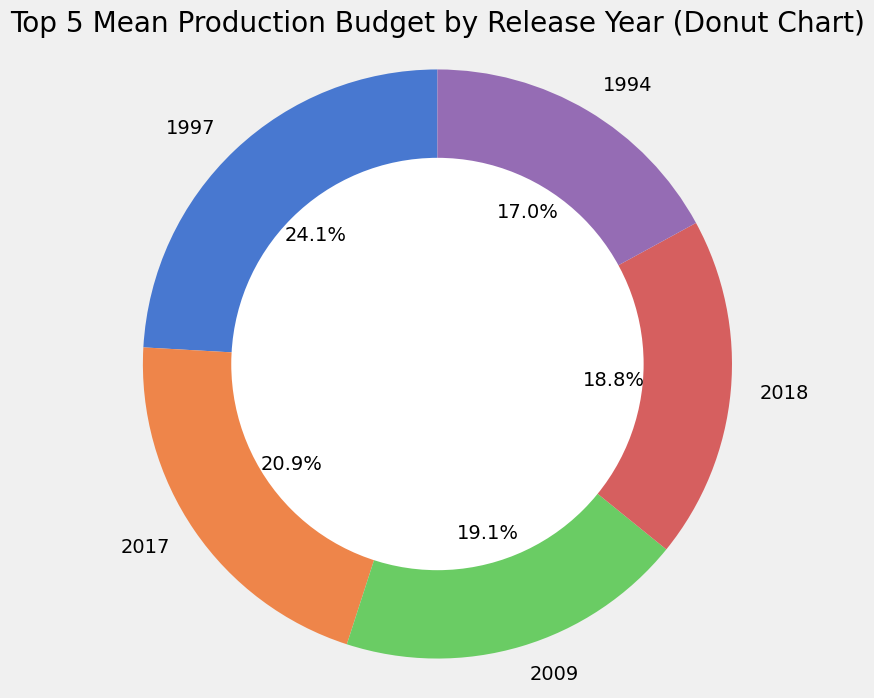

In [40]:
# Sort the DataFrame by 'production_budget' in descending order and select the top five rows
top_five_df = grouped_mean_production_budget_year_df.nlargest(5, 'production_budget')

plt.figure(figsize=(8, 8))  # Adjust the figure size for the donut chart

# Create a pie chart
ax = plt.pie(top_five_df['production_budget'], labels=top_five_df['release_year'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('muted'))

# Draw a white circle at the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  # Equal aspect ratio ensures that the pie/donut is drawn as a circle.

plt.title('Top 5 Mean Production Budget by Release Year (Donut Chart)')
plt.show()


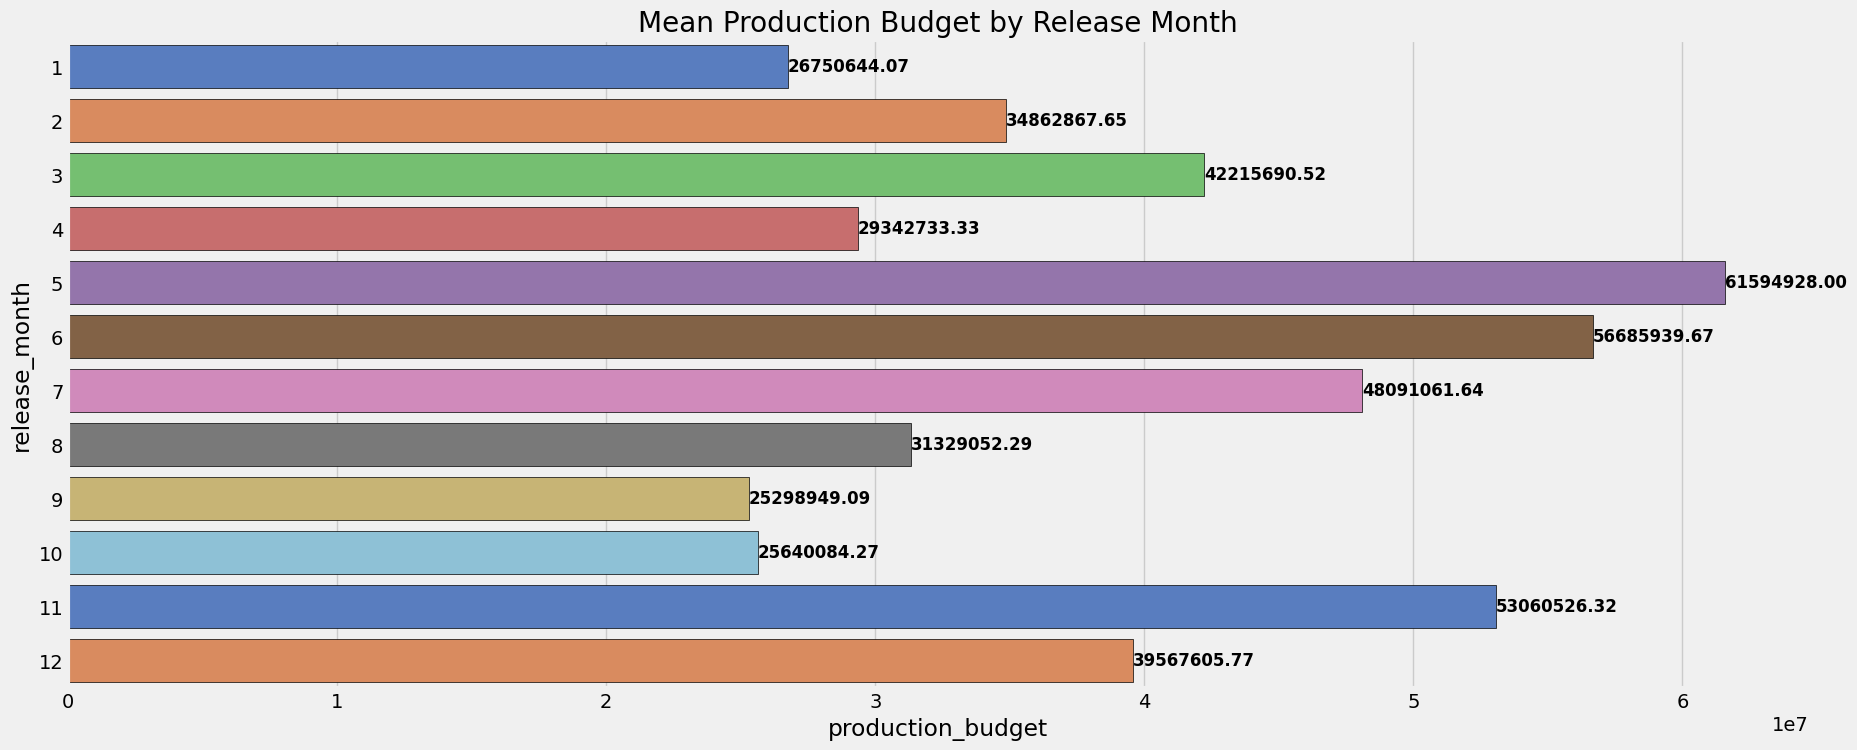

In [41]:
plt.figure(figsize=(20, 8))  # Adjust the figure size for better horizontal display
ax = sns.barplot(x='production_budget', y='release_month', data=grouped_mean_production_budget_month_df, orient='h', edgecolor='black' ,palette='muted')
ax.set_title("Mean Production Budget by Release Month")

# Add annotations beside each bar
for index, value in enumerate(grouped_mean_production_budget_month_df['production_budget']):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=12, weight='bold')

**Insights:**
- **The year `1997` had the highest mean production movie production budgets. Why could this be?**
- **The second half of the year had the most months with the highest mean movie production budgets. Why could this be?**

**Question: What is the average worlwide gross per month / year?**

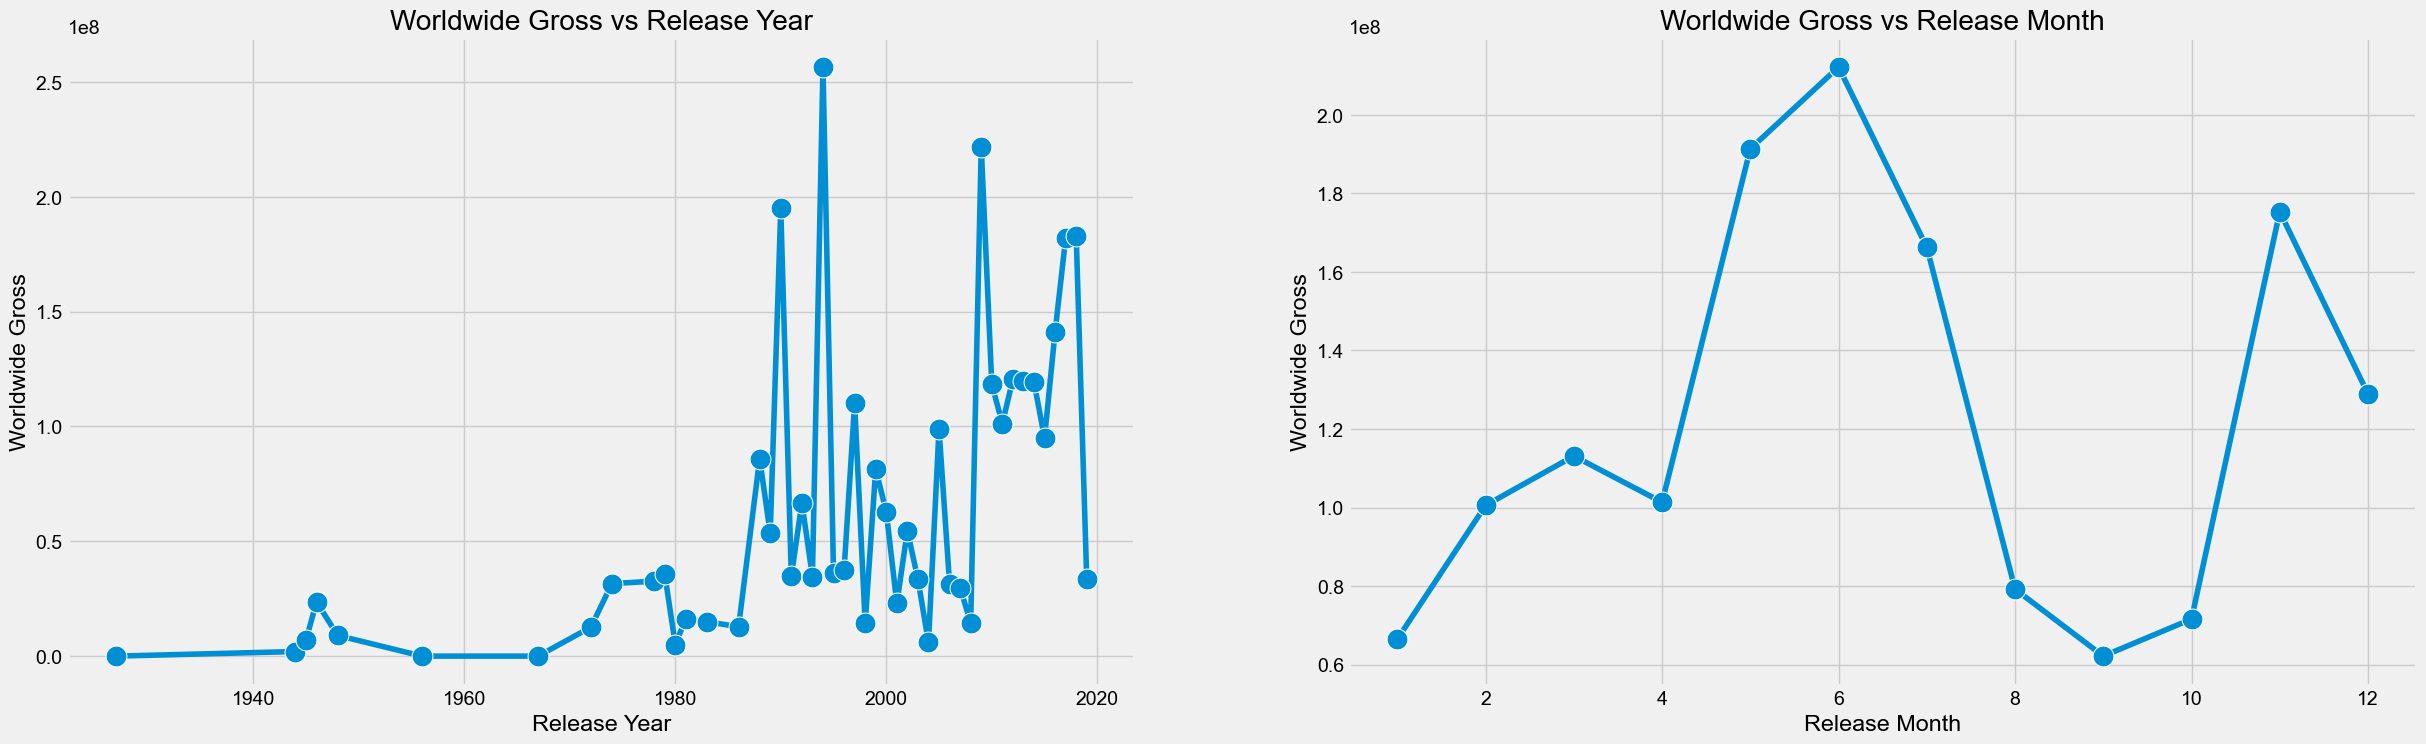

In [42]:
grouped_mean_worldgross_month_df = df.groupby('release_month')['worldwide_gross'].mean().reset_index()

grouped_mean_worldgross_year_df = df.groupby('release_year')['worldwide_gross'].mean().reset_index()

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(ncols=2, figsize=(27, 8))

sns.lineplot(x='release_year', y='worldwide_gross', data=grouped_mean_worldgross_year_df, marker="o", errorbar=('ci', 0), markersize=15, ax=ax[0])
ax[0].set_title('Worldwide Gross vs Release Year')
ax[0].set_xlabel('Release Year')
ax[0].set_ylabel('Worldwide Gross')

sns.lineplot(x='release_month', y='worldwide_gross', marker="o", errorbar=('ci', 0), markersize=15, data=grouped_mean_worldgross_month_df, ax=ax[1])
ax[1].set_title('Worldwide Gross vs Release Month')
ax[1].set_xlabel('Release Month')
ax[1].set_ylabel('Worldwide Gross')


sns.set(style='whitegrid', font_scale=1.2)

plt.show()

**Insights:**
- **Right off the bat we can see that `production budgets` for movies as well as their `worldwide gross revenue` follow a similar trend that seem increase over the years and have a similar trend observed for both aspects over the months. There could be a correlation between the `production budgets` and the `worldwide gross` for each movie produced and released.**

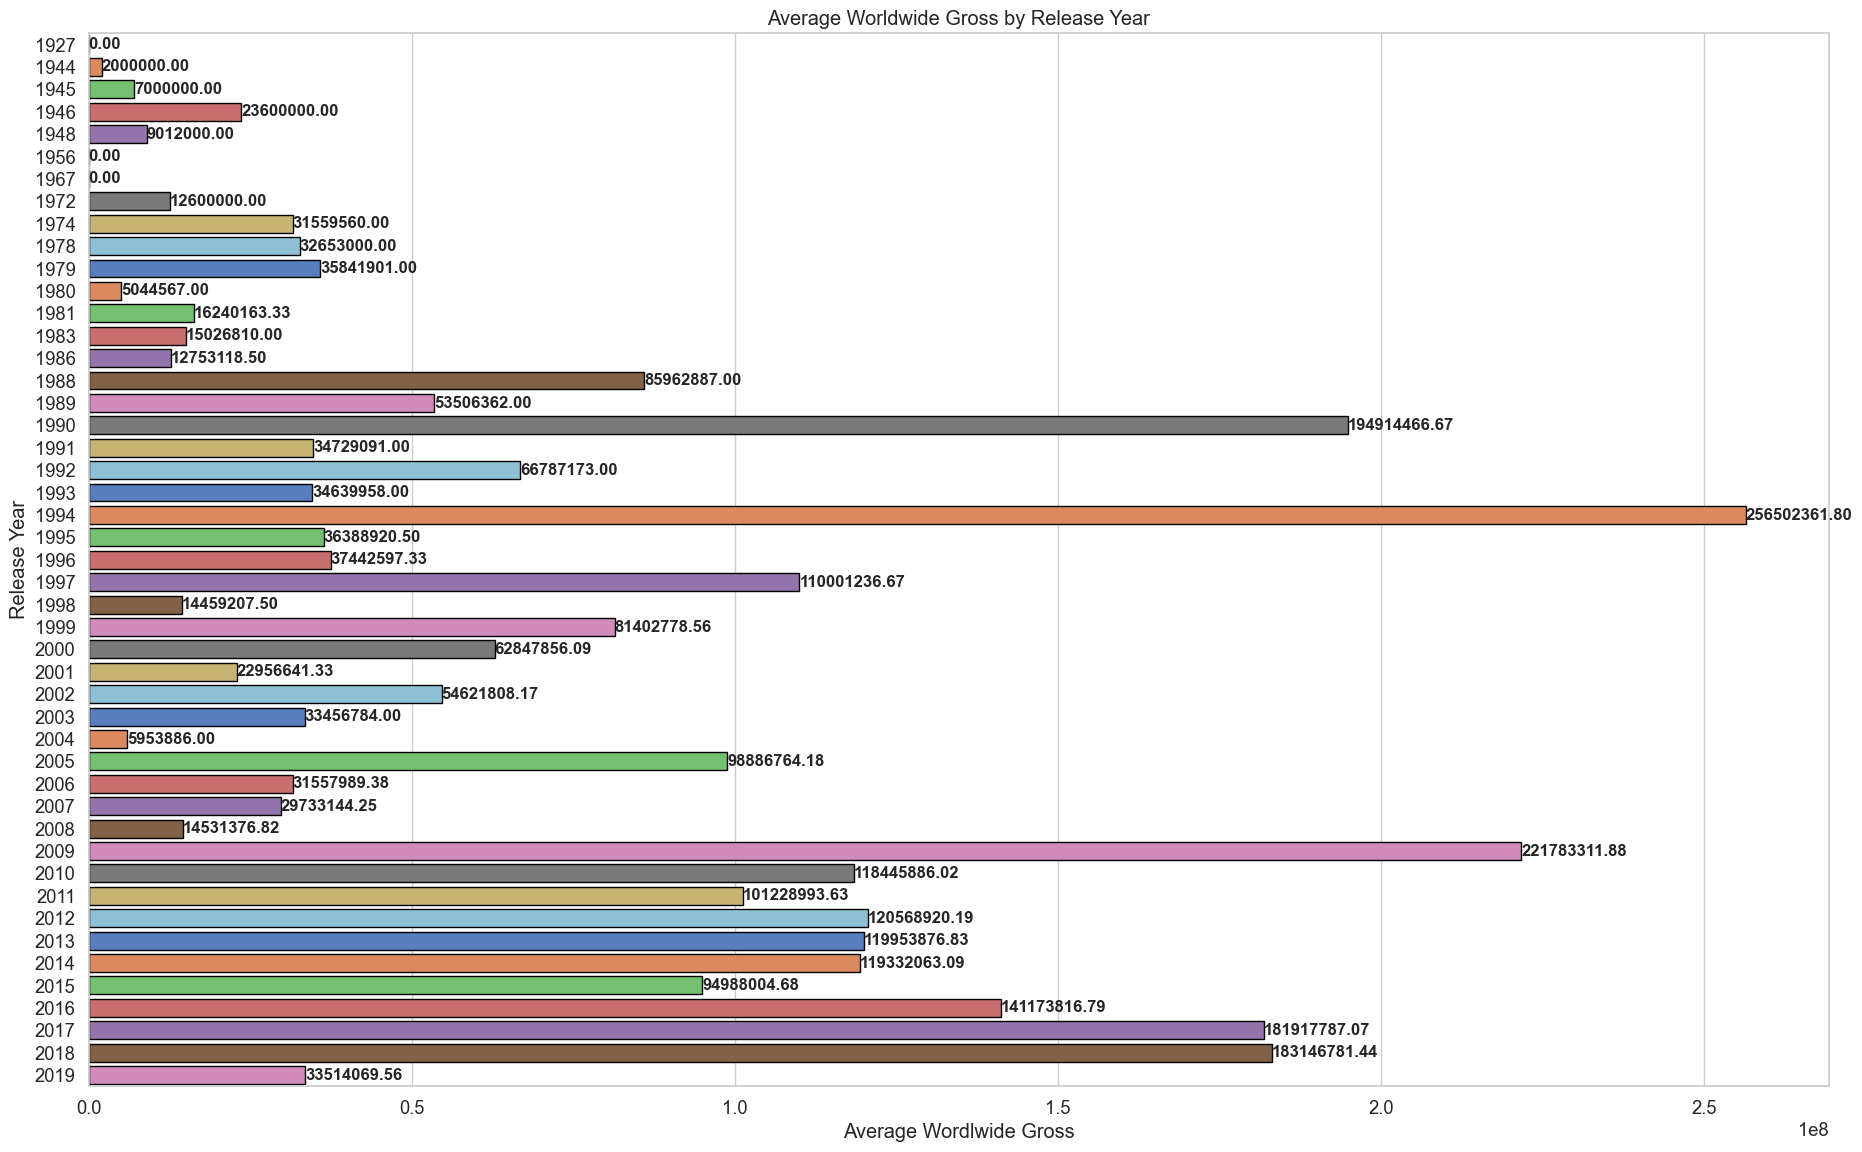

In [43]:
plt.figure(figsize=(20, 13))  # Adjust the figure size for better horizontal display
ax = sns.barplot(x='worldwide_gross', y='release_year', data=grouped_mean_worldgross_year_df, orient='h', edgecolor='black', palette='muted')

# Add annotations beside each bar
for index, value in enumerate(grouped_mean_worldgross_year_df['worldwide_gross']):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=12, weight='bold')

plt.xlabel('Average Wordlwide Gross')
plt.ylabel('Release Year')
plt.title('Average Worldwide Gross by Release Year')
plt.show()

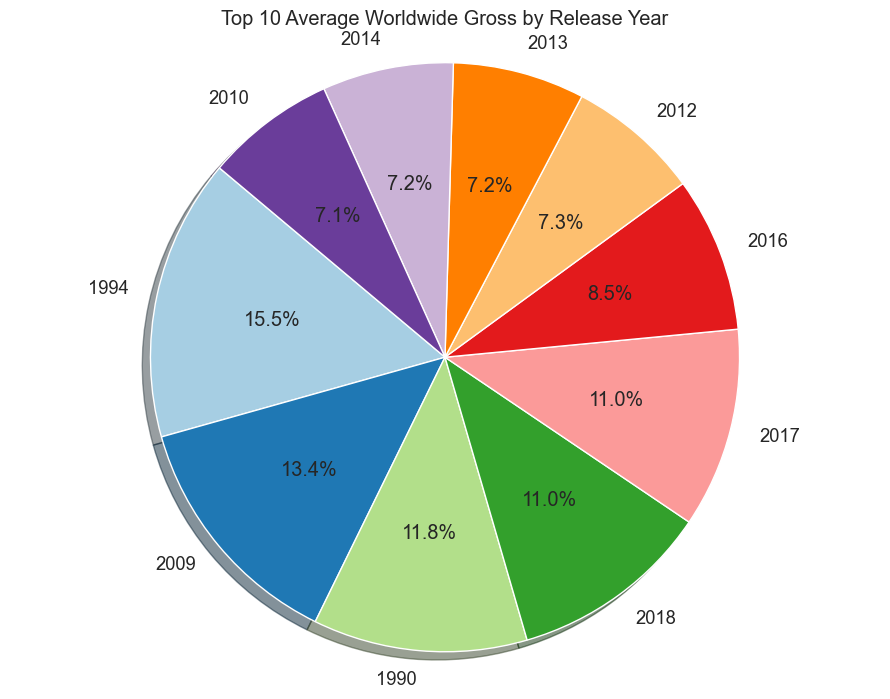

In [44]:
# Sort the DataFrame by 'worldwide_gross' in descending order and select the top ten rows
grouped_mean_worldgross_year_df = grouped_mean_worldgross_year_df.sort_values(by='worldwide_gross', ascending=False).head(10)

# Data for the pie chart
sizes = grouped_mean_worldgross_year_df['worldwide_gross']
years = grouped_mean_worldgross_year_df['release_year']

# Find the index of the maximum value to explode that slice
max_index = sizes.idxmax()

# Create the pie chart with an explosion effect
explode = [0.1 if i == max_index else 0 for i in range(len(years))]
colors = plt.cm.Paired.colors  # You can change the colormap for different colors
plt.figure(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=years, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.title('Top 10 Average Worldwide Gross by Release Year')

plt.show()



**Insights:**
- **Although the year `1997` had the highest average production budget for movies that year, here we can see that the average worldwide gross for movies in the year `1994` was the highest.**

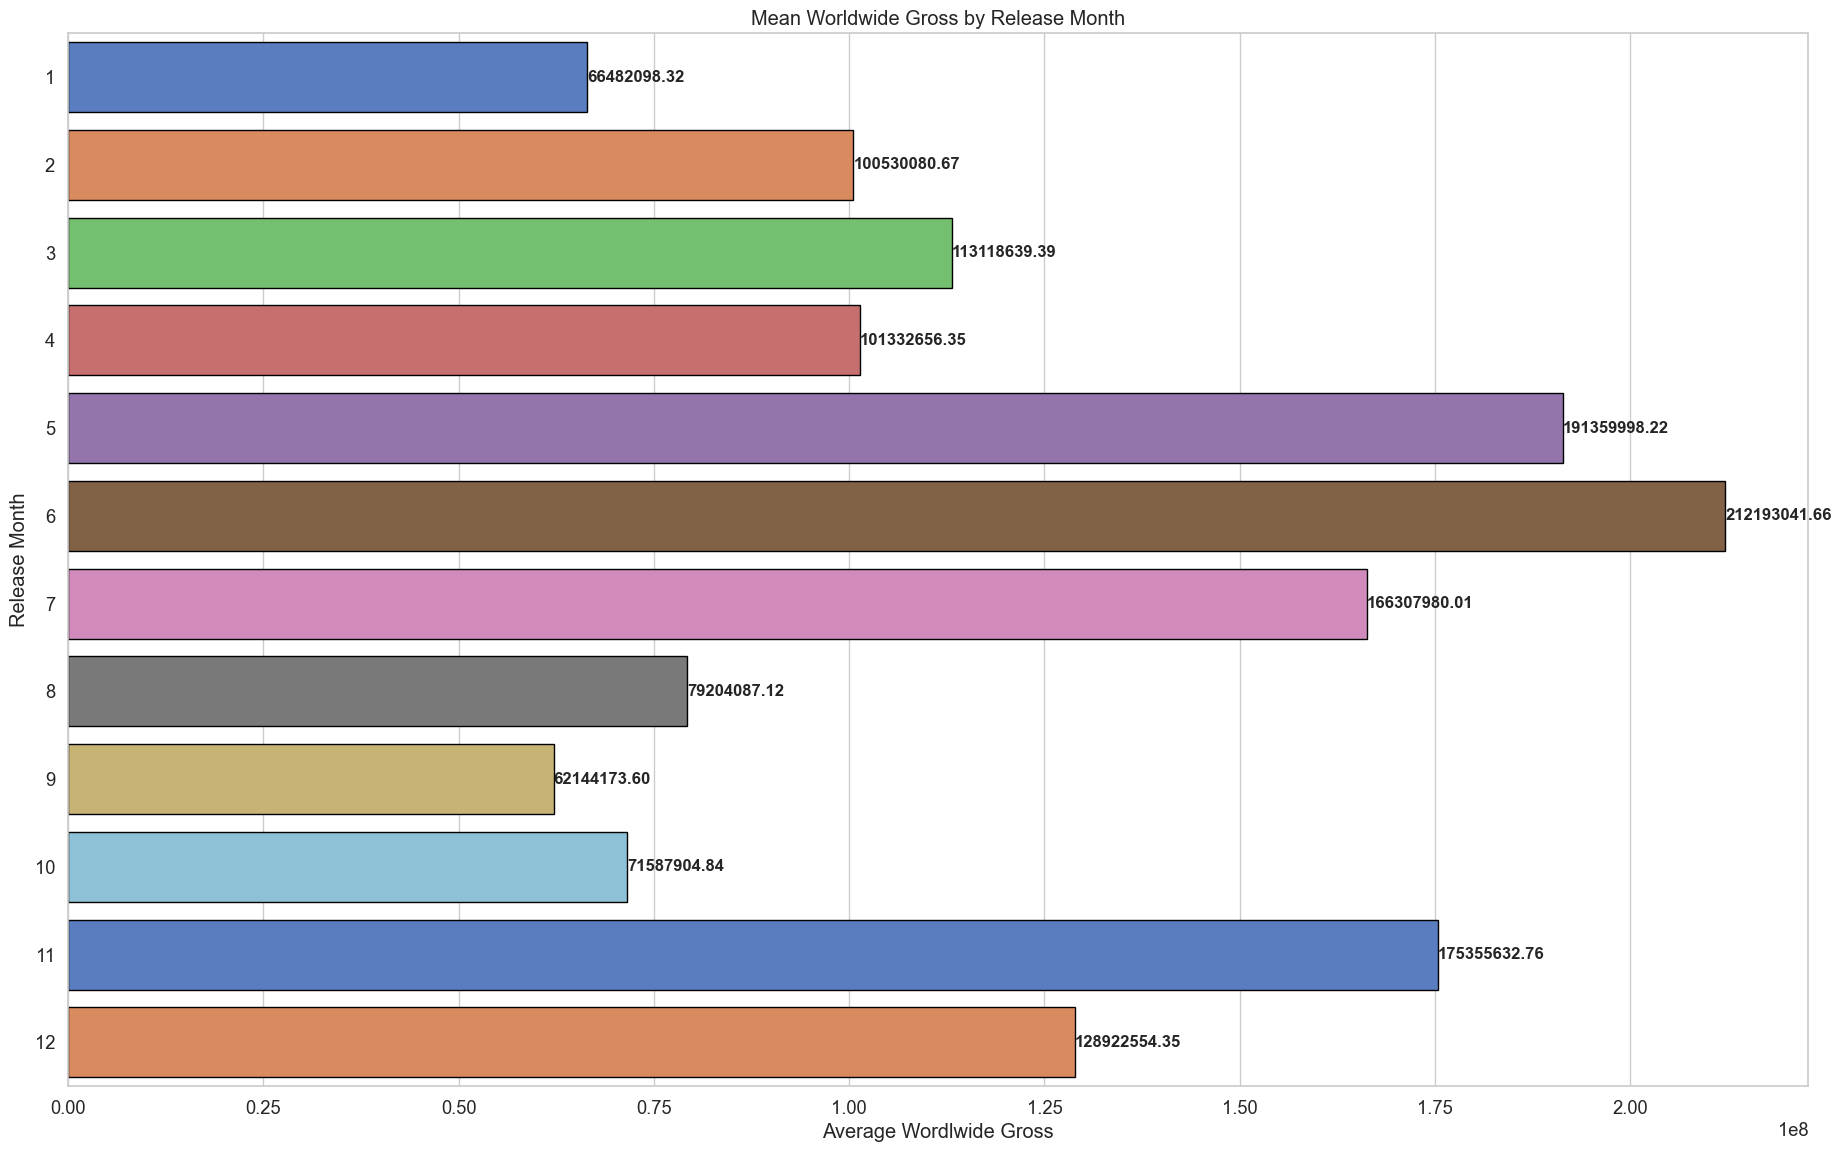

In [45]:
plt.figure(figsize=(20, 13))  # Adjust the figure size for better horizontal display
ax = sns.barplot(x='worldwide_gross', y='release_month', data=grouped_mean_worldgross_month_df, orient='h', edgecolor='black', palette='muted')

# Add annotations beside each bar
for index, value in enumerate(grouped_mean_worldgross_month_df['worldwide_gross']):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=12, weight='bold')

plt.xlabel('Average Wordlwide Gross')
plt.ylabel('Release Month')
plt.title('Mean Worldwide Gross by Release Month')
plt.show()

**Insights:**
- **Here we see a similar trend as in the avaerage production budgets for movies over the course of the year.**

**Question: What are the top ten grossing movies worldwide (US $)?**

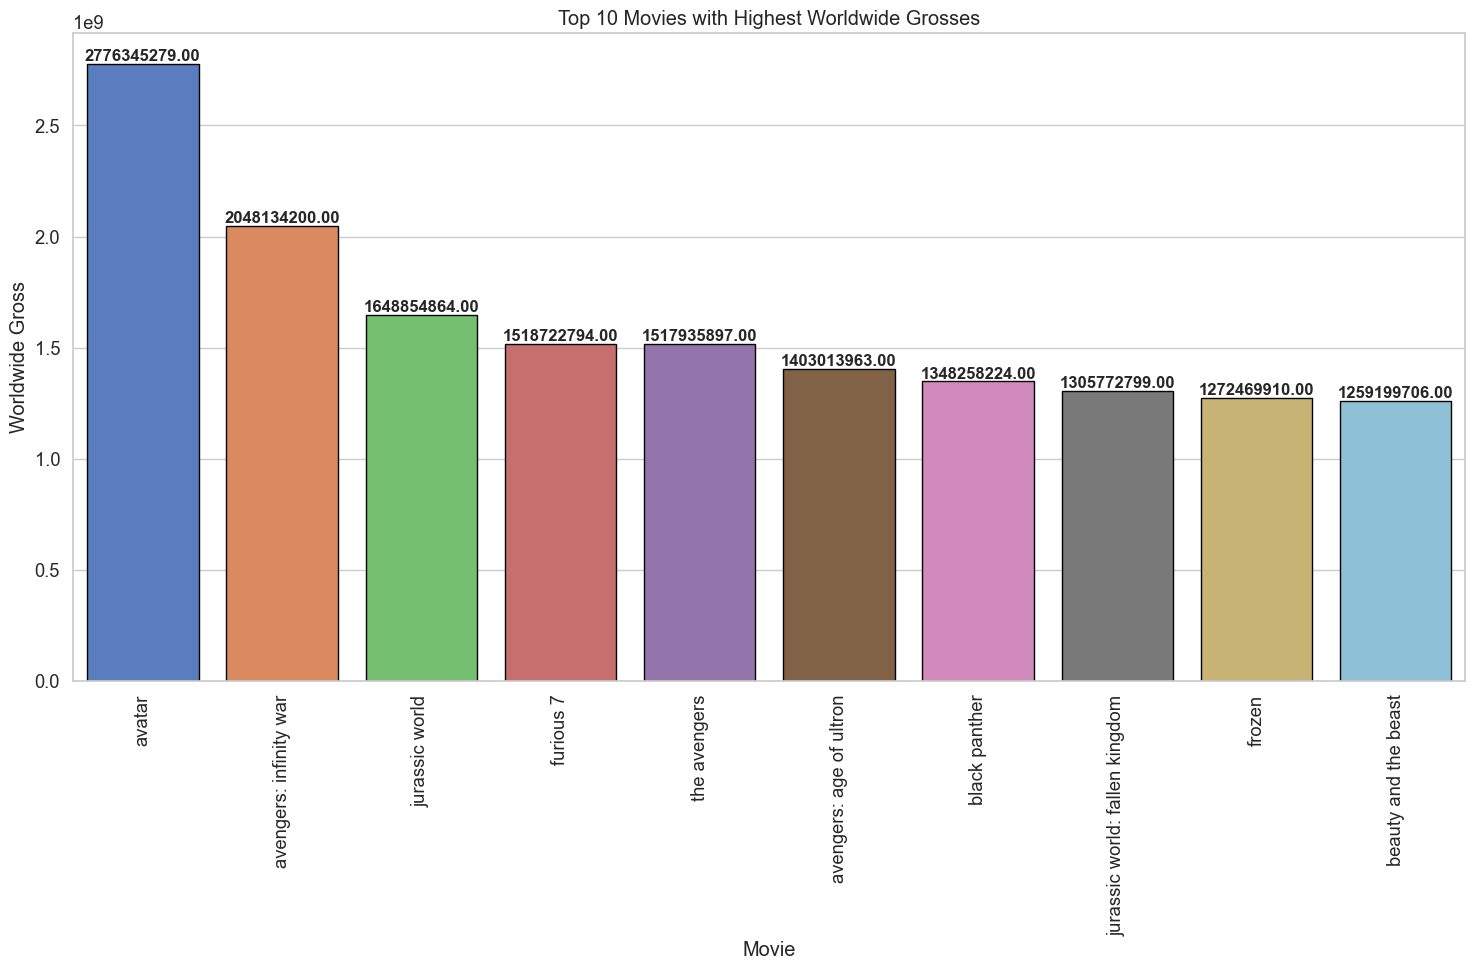

In [46]:
# top 10 movies with highest worldwide gross
top_10_worldwide_gross_df = df.nlargest(10, 'worldwide_gross')

plt.figure(figsize=(16, 8))  # Adjust the figure size for better vertical display
ax = sns.barplot(x='movie_title', y='worldwide_gross', data=top_10_worldwide_gross_df, orient='v', edgecolor='black', palette='muted')

# Add annotations above each bar
for index, value in enumerate(top_10_worldwide_gross_df['worldwide_gross']):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12, weight='bold')

plt.ylabel('Worldwide Gross')
plt.xlabel('Movie')
plt.title('Top 10 Movies with Highest Worldwide Grosses')
plt.xticks(rotation=90)  # Rotate the movie titles for better readability
plt.show()


**Insights:**
- **`Avatar` leads in the worlwide gross margin followed by `Avengers: Infinity War`. Interestingly there are two other `Avengers` entries in this category and `Blackpanther` which is also a franchise from the same `Marvel Studios` that the `Avengers` franchise belong to.**

**Question: What are the top ten highset project budgets (US $)?**

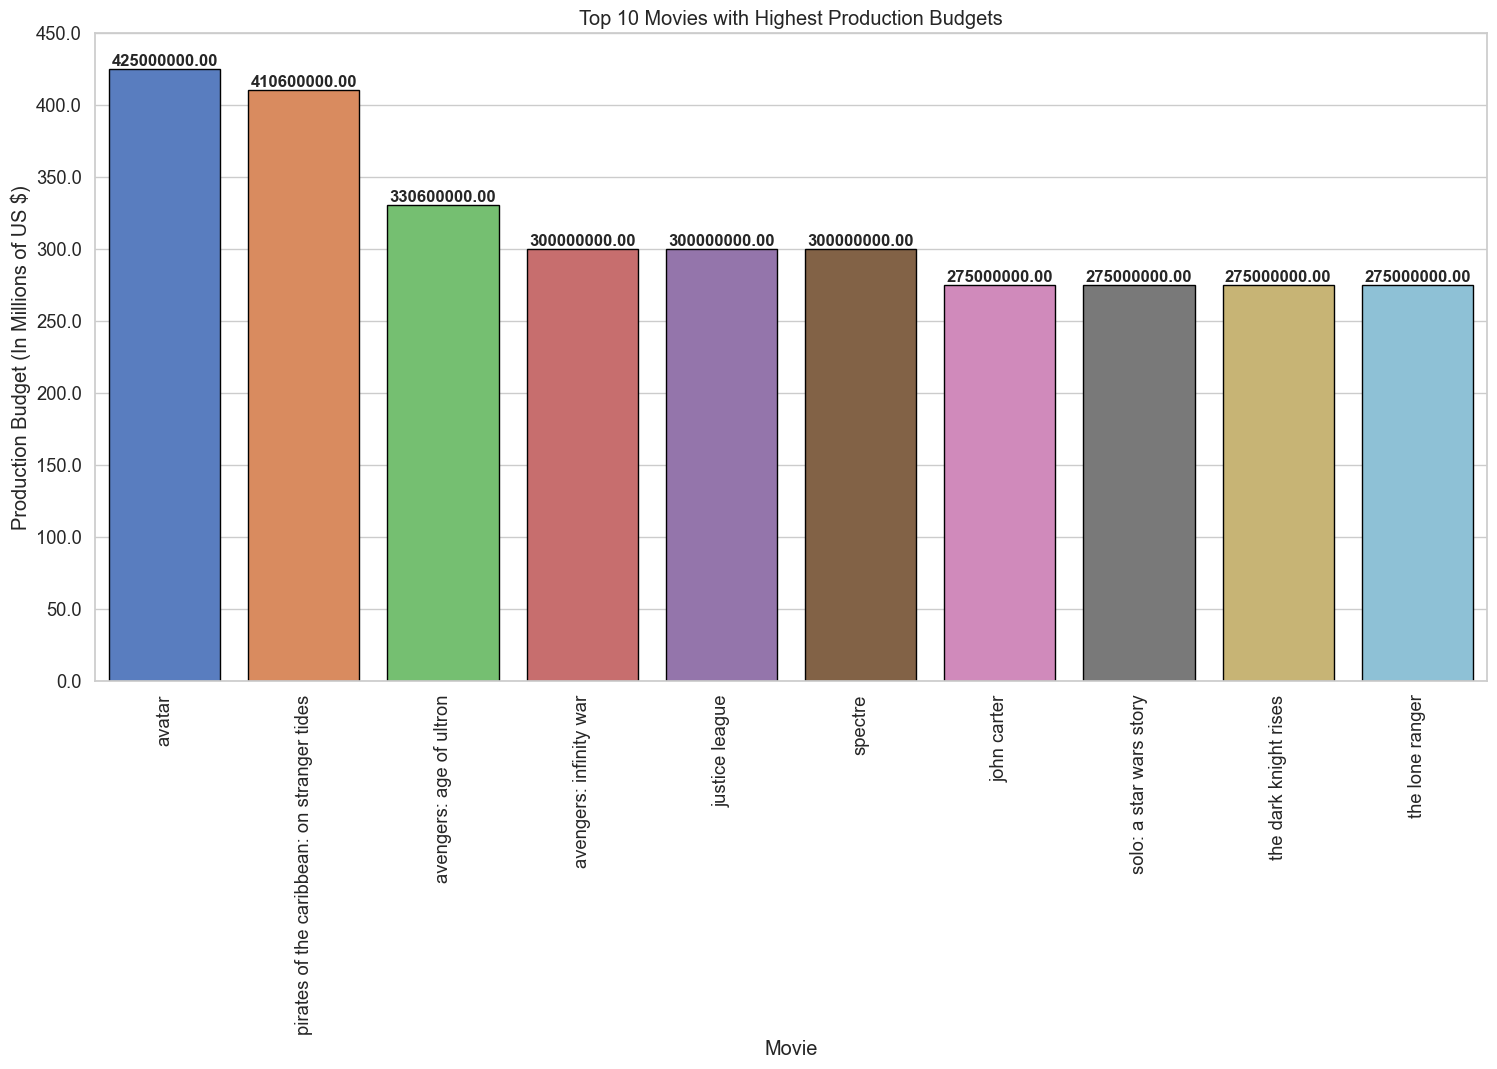

In [47]:
# top 10 movies with highest production budget
top_10_production_budget_df = df.nlargest(10, 'production_budget')

plt.figure(figsize=(16, 8))  # Adjust the figure size for better vertical display
ax = sns.barplot(x='movie_title', y='production_budget', data=top_10_production_budget_df, orient='v', edgecolor='black', palette='muted')
sns.set_palette("Reds")
plt.yticks(ax.get_yticks(), ax.get_yticks()/1000000)

# Add annotations above each bar
for index, value in enumerate(top_10_production_budget_df['production_budget']):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12, weight='bold')

plt.ylabel('Production Budget (In Millions of US $)')
plt.xlabel('Movie')
plt.title('Top 10 Movies with Highest Production Budgets')
plt.xticks(rotation=90)  # Rotate the movie titles for better readability
plt.show()


**Insights:**
- **`Avatar` once again leads in the projects with the highest production markets. There are also two entries of the `Avengers` franchise although `Disney's Pirates of the Carribean` takes the second place in this category.**

**Question: What are the top ten most popular movies?**

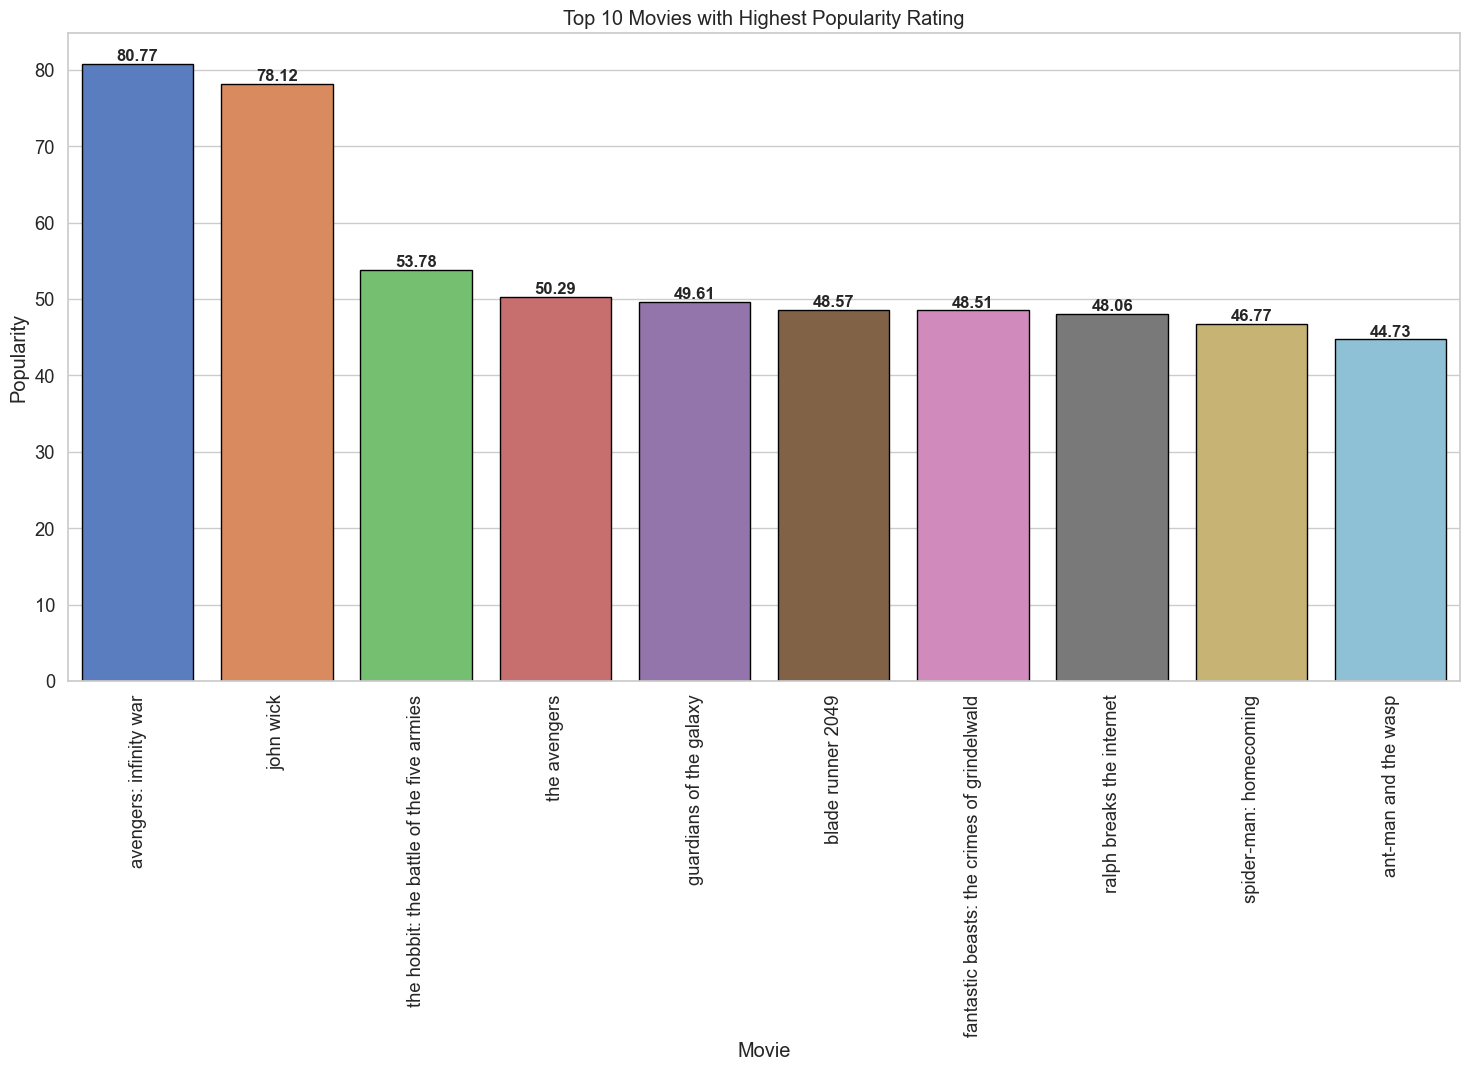

In [48]:
grouped_popularity_df = df.groupby('movie_title')['popularity'].mean().reset_index()

# top 10 movies with highest popularity rating
top_10_popularity_df = grouped_popularity_df.nlargest(10, 'popularity')

plt.figure(figsize=(16, 8))  # Adjust the figure size for better vertical display
ax = sns.barplot(x='movie_title', y='popularity', data=top_10_popularity_df, orient='v', edgecolor='black', palette='muted')


# Add annotations above each bar
for index, value in enumerate(top_10_popularity_df['popularity']):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12, weight='bold')

plt.ylabel('Popularity')
plt.xlabel('Movie')
plt.title('Top 10 Movies with Highest Popularity Rating')
plt.xticks(rotation=90)  # Rotate the movie titles for better readability
plt.show()


**Insights:**
- **`Avengers Infinity War` has the highet popularity score followed by `John Wick` then  the `Horbit: The Battle of The Five Armies`. `John Wick` and `Horbit: The Battle of The Five Armies` were not among the highest grossing films but still managed to get a very high populariy score. They also were not among the movie projects with the highest production budgets.**

- **Also we notice that there is another `Anengers` entry in the the top ten popularity score. This seems to be franchise that has done well throughout it's lifetime.**

**Question: What are the top ten most popular movies by Vote Count?**

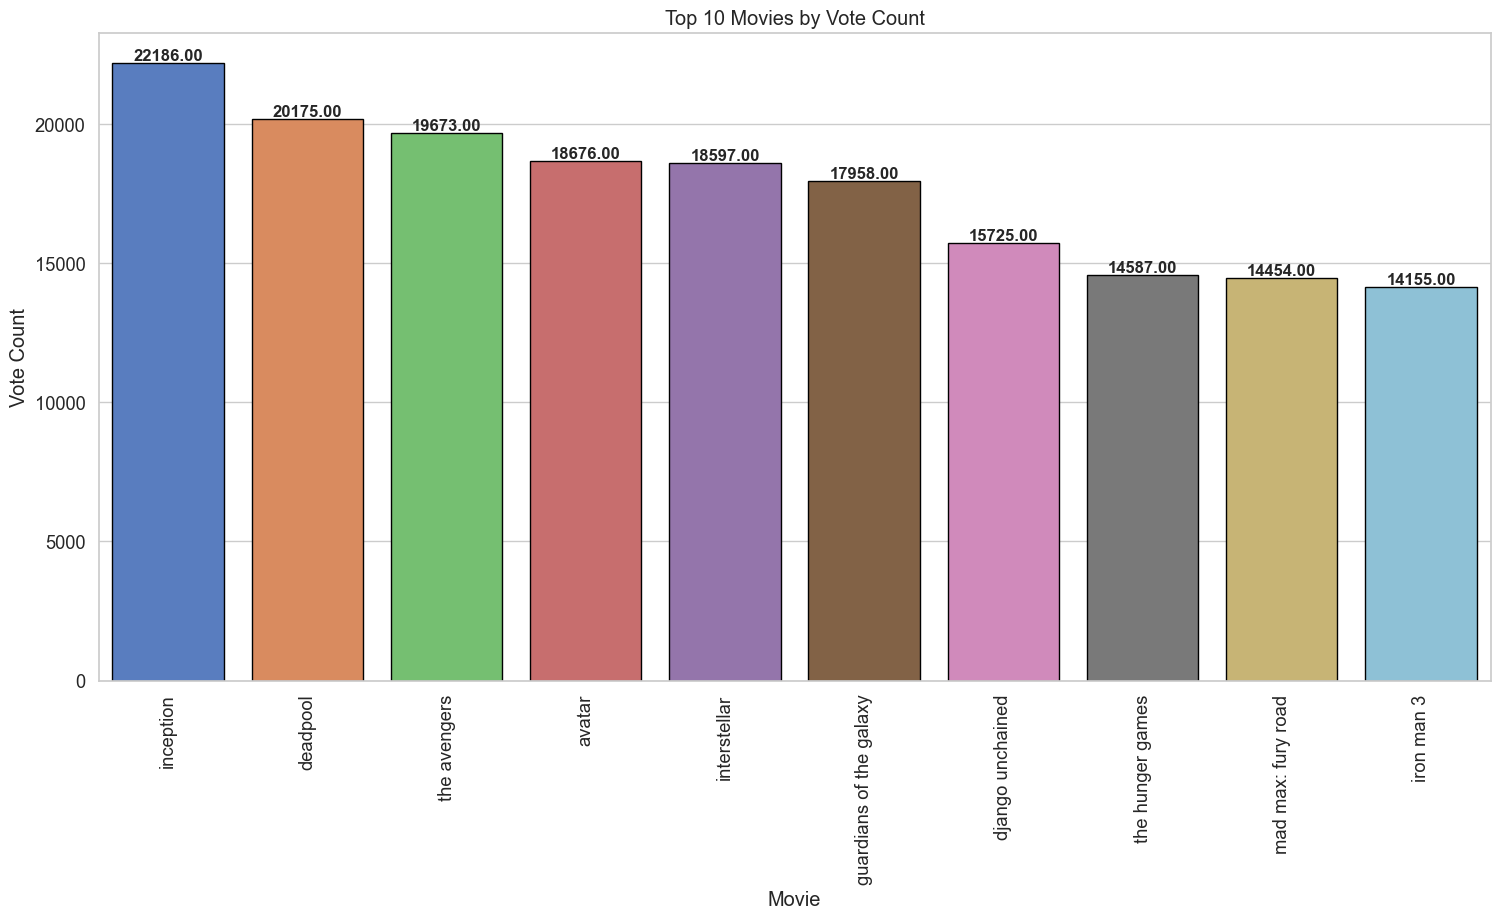

In [49]:
# top 10 movies by vote count
top_10_vote_count_df = df.nlargest(10, 'vote_count')

plt.figure(figsize=(16, 8))  # Adjust the figure size for better vertical display
ax = sns.barplot(x='movie_title', y='vote_count', data=top_10_vote_count_df, orient='v', edgecolor='black', palette='muted')


# Add annotations above each bar
for index, value in enumerate(top_10_vote_count_df['vote_count']):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12, weight='bold')

plt.ylabel('Vote Count')
plt.xlabel('Movie')
plt.title('Top 10 Movies by Vote Count')
plt.xticks(rotation=90)  # Rotate the movie titles for better readability
plt.show()

**Question: Is there a strong correlation with "worldwide_gross?**

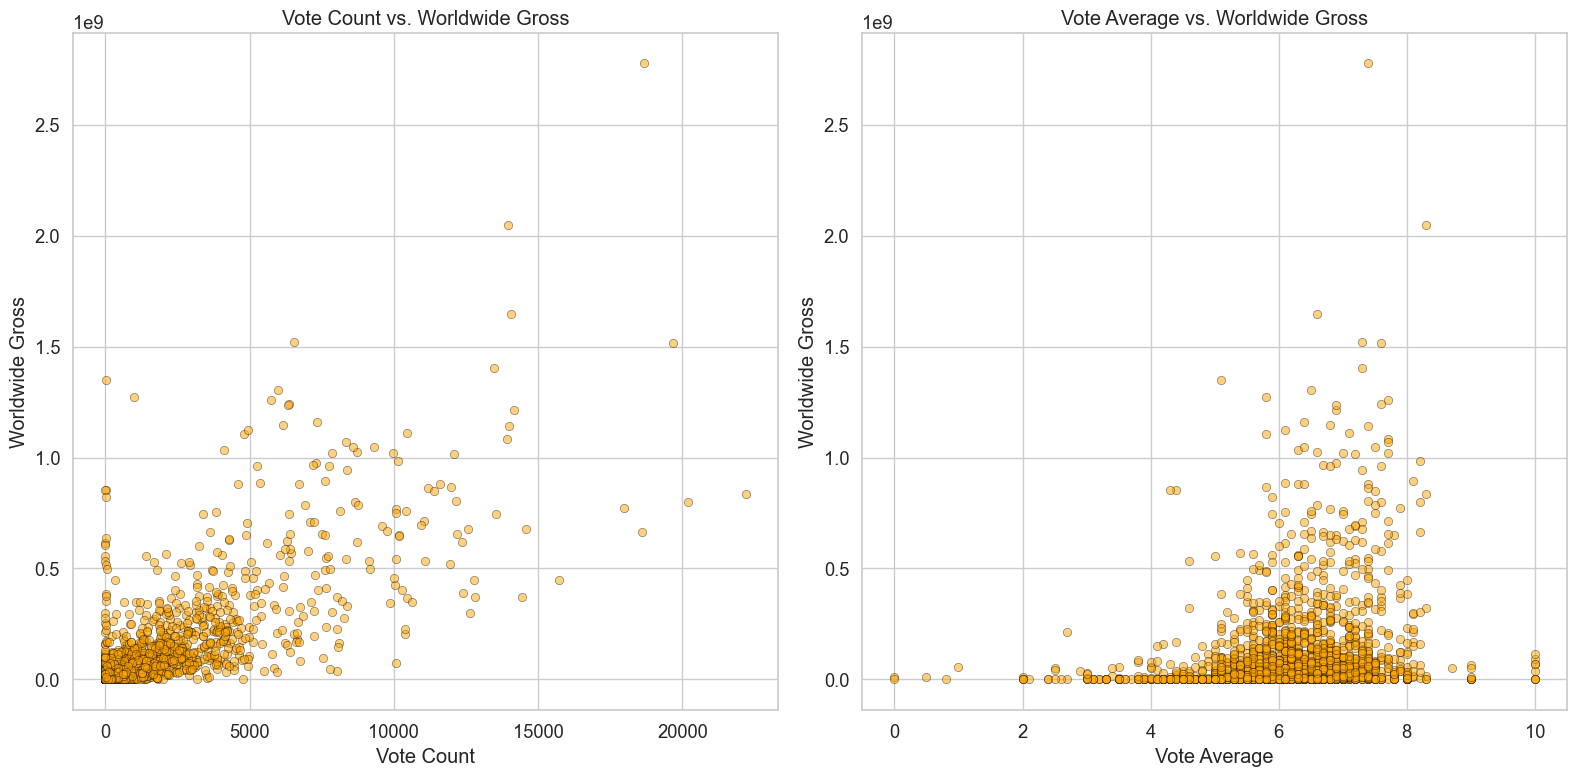

In [50]:
# Scatterplot of vote_count vs. worldwide_gross
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1 - vote_count vs. worldwide_gross
ax1 = sns.scatterplot(x='vote_count', y='worldwide_gross', data=df, edgecolor='black', color='orange', alpha=0.5, ax=axes[0])
ax1.set_xlabel('Vote Count')
ax1.set_ylabel('Worldwide Gross')
ax1.set_title('Vote Count vs. Worldwide Gross')

# Plot 2 - vote_average vs. worldwide_gross
ax2 = sns.scatterplot(x='vote_average', y='worldwide_gross', data=df, edgecolor='black', color='orange', alpha=0.5, ax=axes[1])
ax2.set_xlabel('Vote Average')
ax2.set_ylabel('Worldwide Gross')
ax2.set_title('Vote Average vs. Worldwide Gross')

plt.tight_layout()
plt.show()


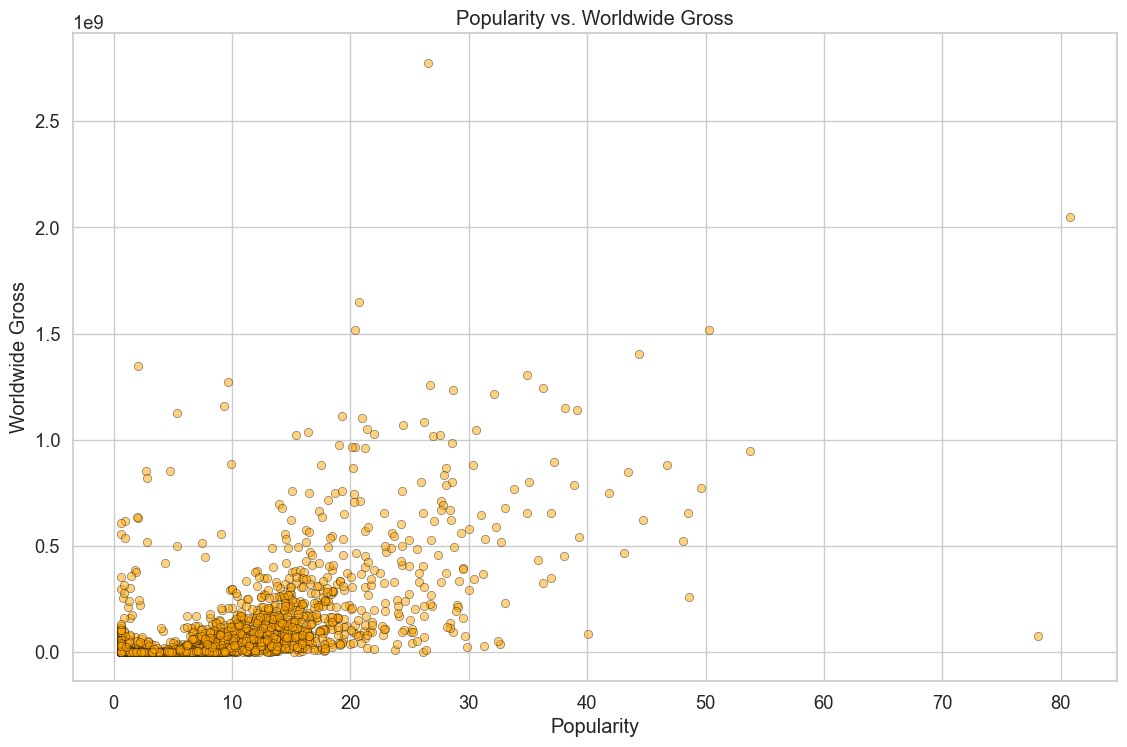

In [51]:
# Scatterplot of popularity. worldwide_gross
fig, ax = plt.subplots(figsize=(12, 8))

ax = sns.scatterplot(x='popularity', y='worldwide_gross', data=df, edgecolor='black', color='orange', alpha=0.5, ax=ax)
ax.set_xlabel('Popularity')
ax.set_ylabel('Worldwide Gross')
ax.set_title('Popularity vs. Worldwide Gross')

plt.show()

**Question: What is the relationship between Production Budgets and the Worlwide Gross?**

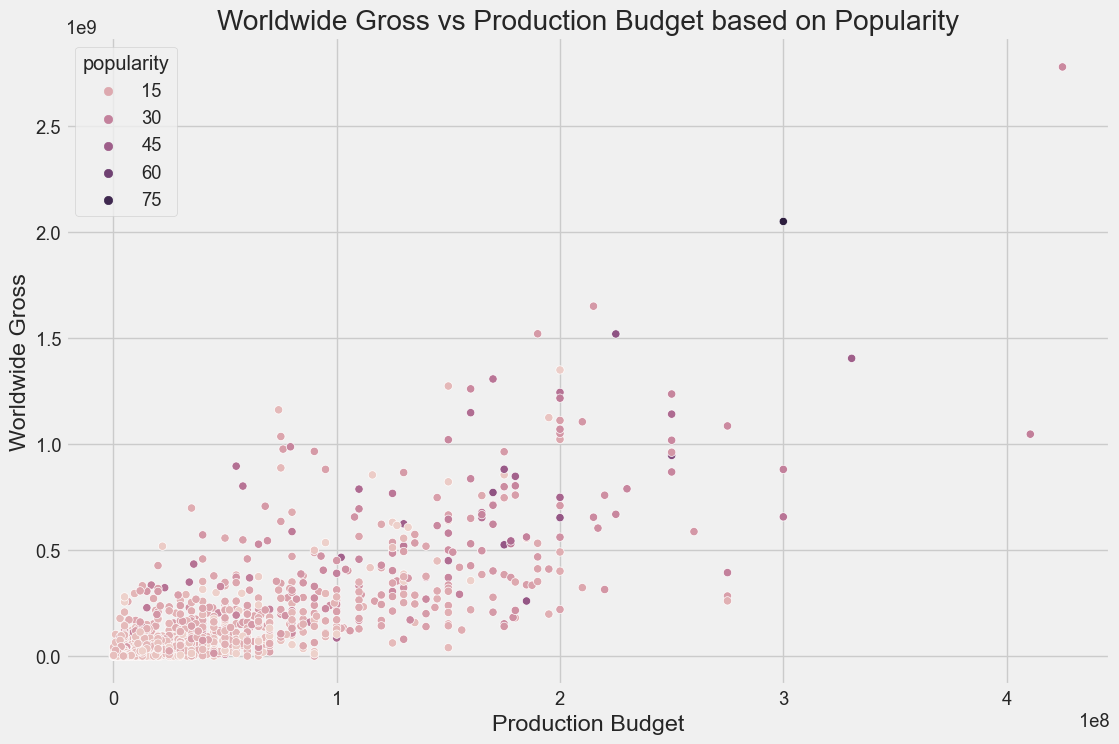

In [52]:
# scatterplot of worlwide gross vs production budget
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(x=df['production_budget'], y=df['worldwide_gross'], data=df, hue='popularity')

ax.set_title('Worldwide Gross vs Production Budget based on Popularity')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide Gross')

plt.show()

**Question: Is the relationship between the movie genre and how much it will gross worlwide that year?**

In [54]:
genres_mean_grouped = df.groupby("genres")['worldwide_gross'].mean().reset_index()

genres_mean_grouped


,genres,worldwide_gross
0,action,6.096726e+07
1,adventure,4.984382e+08
2,animation,3.289214e+08
3,comedy,6.153091e+07
4,crime,9.962487e+07
5,cross-genre,1.328004e+08
6,documentary,3.627777e+07
7,drama,3.445003e+07
8,family,9.900000e+03
9,fantasy,1.739150e+07


In [57]:
genres_mean_sorted = genres_mean_grouped.sort_values(by='worldwide_gross', ascending=True)
genres_mean_sorted = genres_mean_sorted.drop(genres_mean_sorted.index[:7])
genres_mean_sorted


,genres,worldwide_gross
0,action,6.096726e+07
3,comedy,6.153091e+07
4,crime,9.962487e+07
10,horror,1.194058e+08
5,cross-genre,1.328004e+08
12,musical,1.910826e+08
13,sci-fi,3.034499e+08
2,animation,3.289214e+08
1,adventure,4.984382e+08


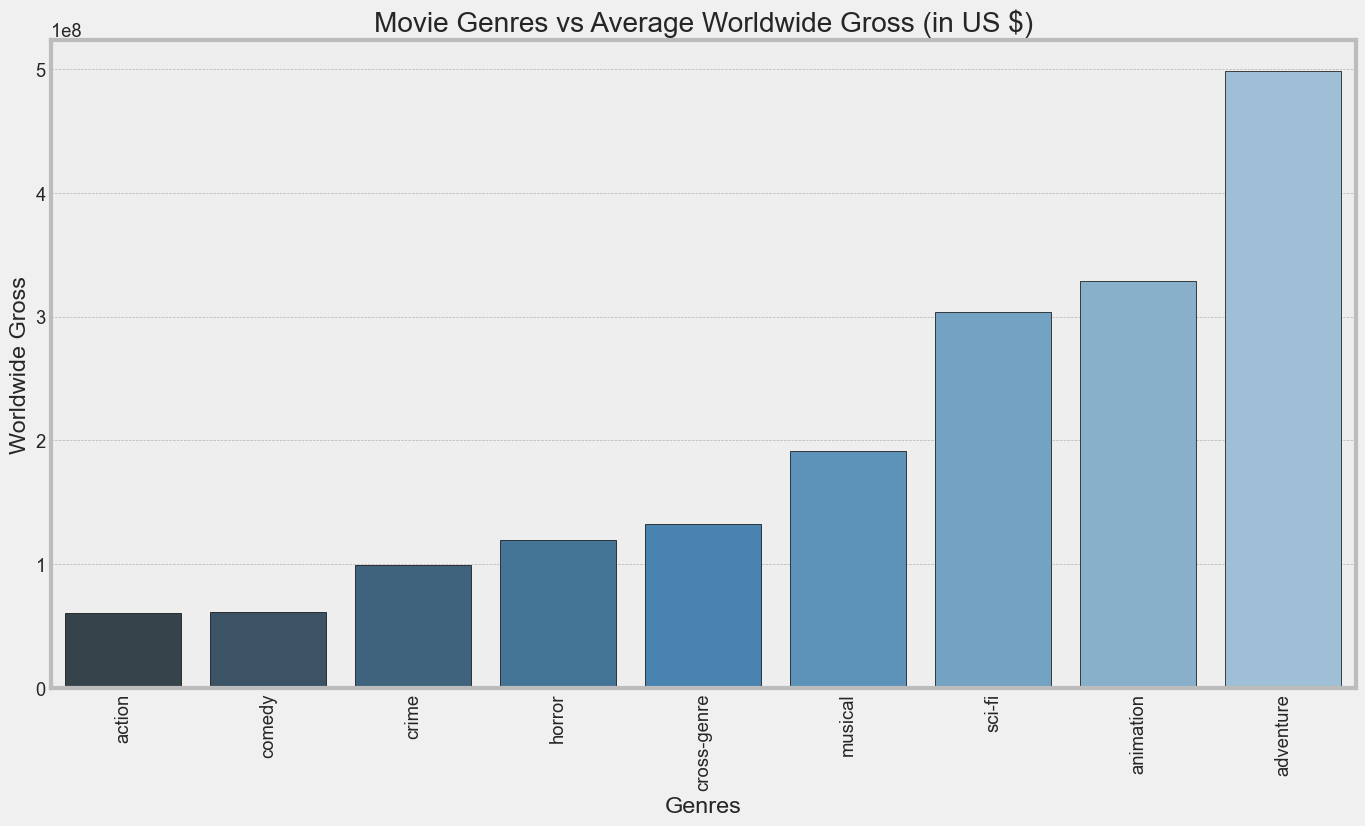

In [59]:
#scatterplot of genres vs. worldwide_gross (average)
plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(15, 8))

palette = sns.color_palette("Blues_d", len(genres_mean_sorted))

sns.barplot(x=genres_mean_sorted['genres'], y=genres_mean_sorted['worldwide_gross'], data=genres_mean_sorted, palette=np.array(palette[::-1]), edgecolor='black')

ax.set_title('Movie Genres vs Average Worldwide Gross (in US $)')
ax.set_xlabel('Genres')
ax.set_ylabel('Worldwide Gross')

plt.xticks(x=genres_mean_sorted['genres'], rotation=90)

plt.show()

### Multivariate Data Analysis.

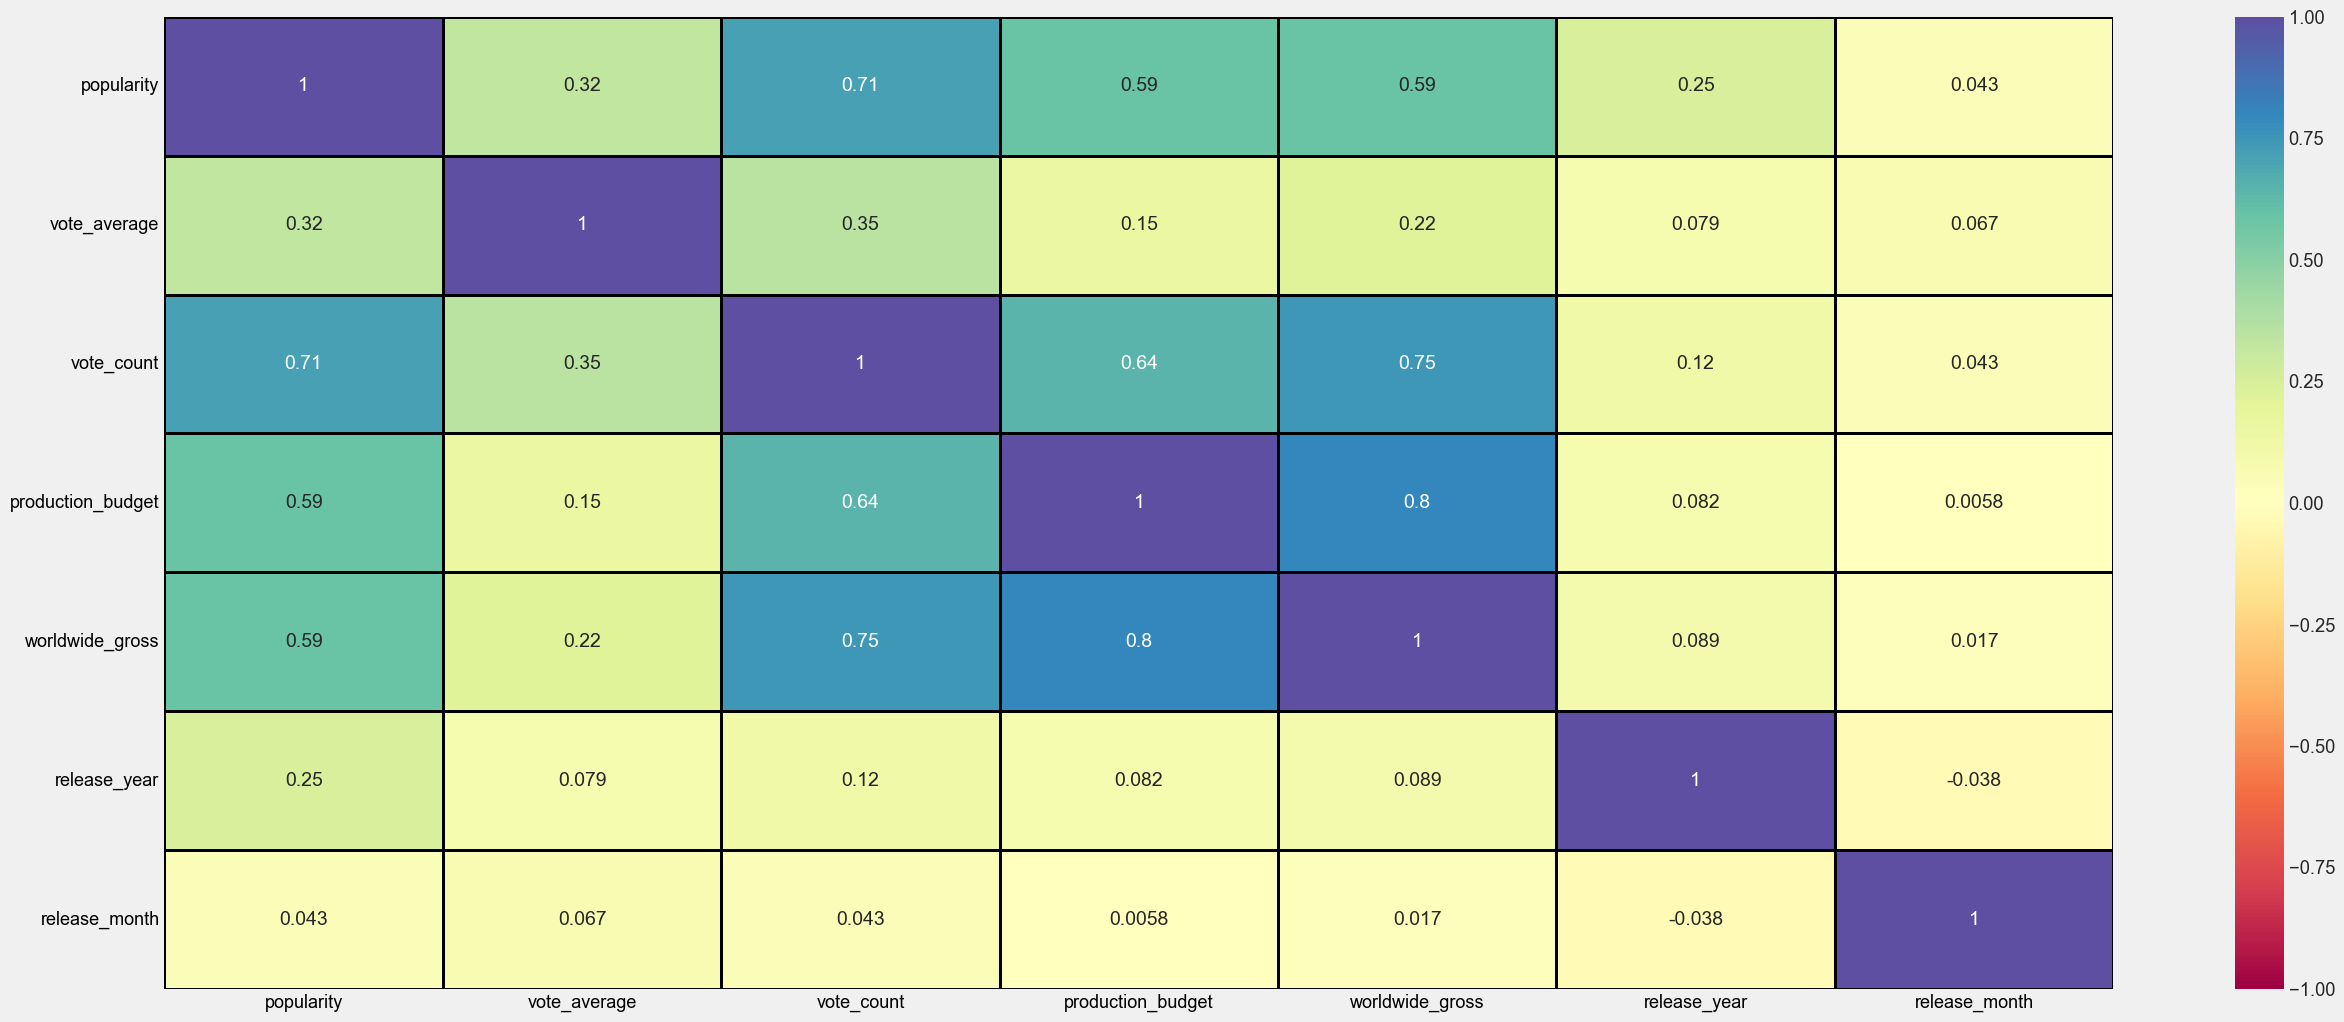

In [60]:
# Get the list of numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Create a correlation matrix for the numeric columns
df_corr = df[numeric_cols].corr()

df_corr
# plotting the correlations onto a heatmap
plt.figure(figsize = (28,12))
sns.heatmap(df_corr, vmin = -1, vmax = 1, annot=True, linewidths= 1, linecolor='black', cmap = "Spectral")
plt.xticks(color='black', fontsize=13)
plt.yticks(color='black', fontsize=13)
plt.show()

**Insights:**
- **We see a strong positive correlation between `vote_count` and the `popularity` of a movie.**
- **We equally see a strong positive relationship between the `production_budget`,`wordwide gross` of a movie with the `popularity` of a movie.**
- **A strong positive relationship is also witnessed between the `popularity` of a movie and the `vote_count` of a movie.**
- **We equally see a strong positive relationship between the `production_budget`,`wordwide gross` of a movie with the `vote_count` of a movie.**
- **There is also a very strong positive correlation between the `production_budget` and the `worldwide_gross` of a movie. It is actually the highest correlation in the correlation matrix with t correlation value of `0.8`**